# Willow Creek - File 3

20
Beam 1, box 0 in willowcreek file 3 has no data.
Beam 1, box 2 in willowcreek file 3 has no data.
Beam 1, box 3 in willowcreek file 3 has no data.
Beam 1, box 4 in willowcreek file 3 has no data.
Beam 1, box 5 in willowcreek file 3 has no data.
Beam 1, box 6 in willowcreek file 3 has no data.
Beam 1, box 7 in willowcreek file 3 has no data.
Beam 1, box 8 in willowcreek file 3 has no data.
Beam 1, box 10 in willowcreek file 3 has no data.
Beam 1, box 11 in willowcreek file 3 has no data.
Beam 1, box 12 in willowcreek file 3 has no data.
Beam 1, box 13 in willowcreek file 3 has no data.
Beam 1, box 14 in willowcreek file 3 has no data.
Beam 1, box 15 in willowcreek file 3 has no data.
Beam 1, box 16 in willowcreek file 3 has no data.
Beam 1, box 18 in willowcreek file 3 has no data.
Beam 1, box 19 in willowcreek file 3 has no data.
Beam 1, box 20 in willowcreek file 3 has no data.
Beam 1, box 21 in willowcreek file 3 has no data.
Beam 1, box 22 in willowcreek file 3 has no data.
Beam 

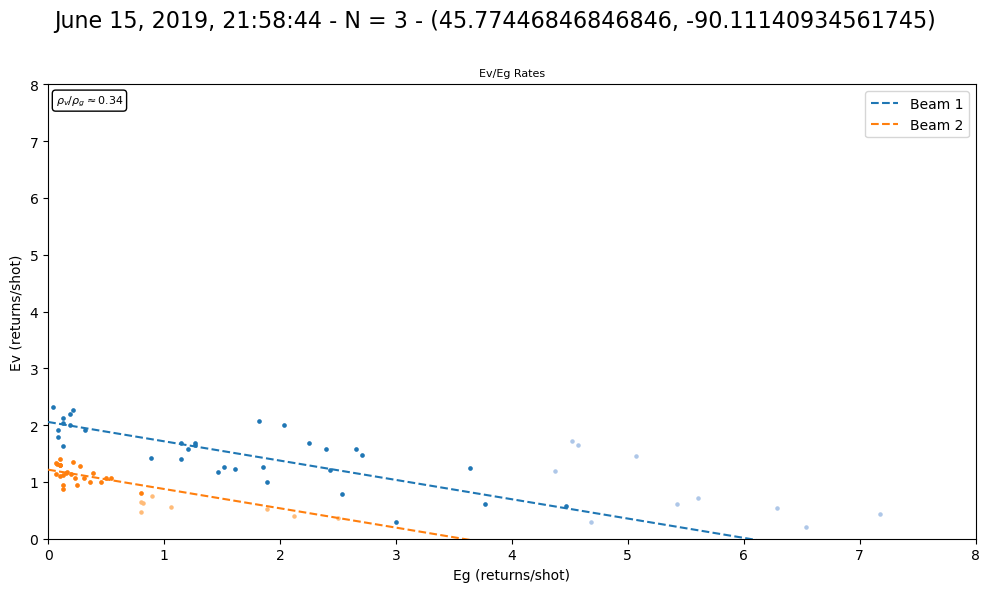

76
76
19
19
28
28
59
59
12
12
36
36
18
18
8
8
40
40
24
24
62
62


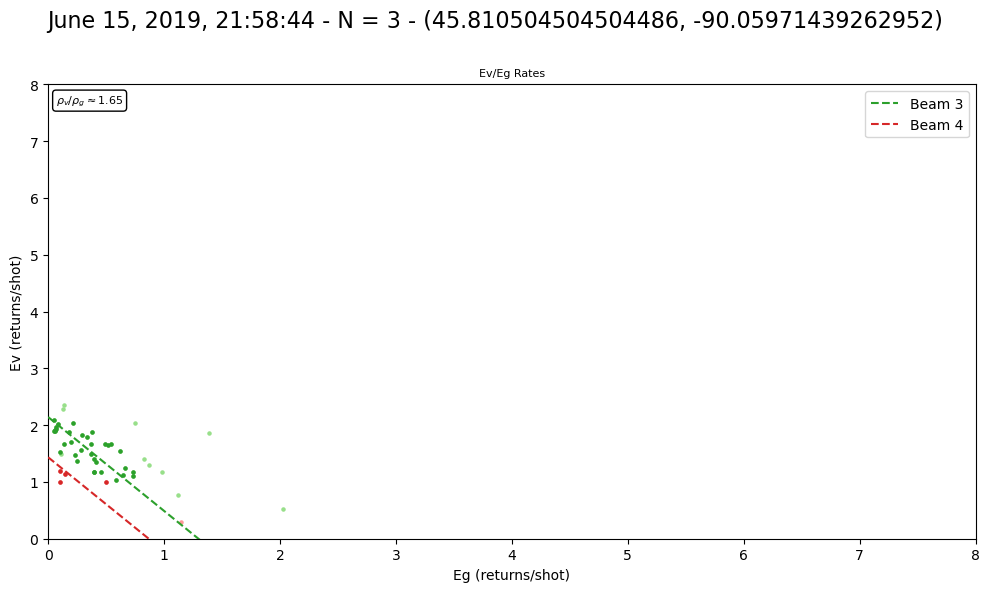

49
49
29
29


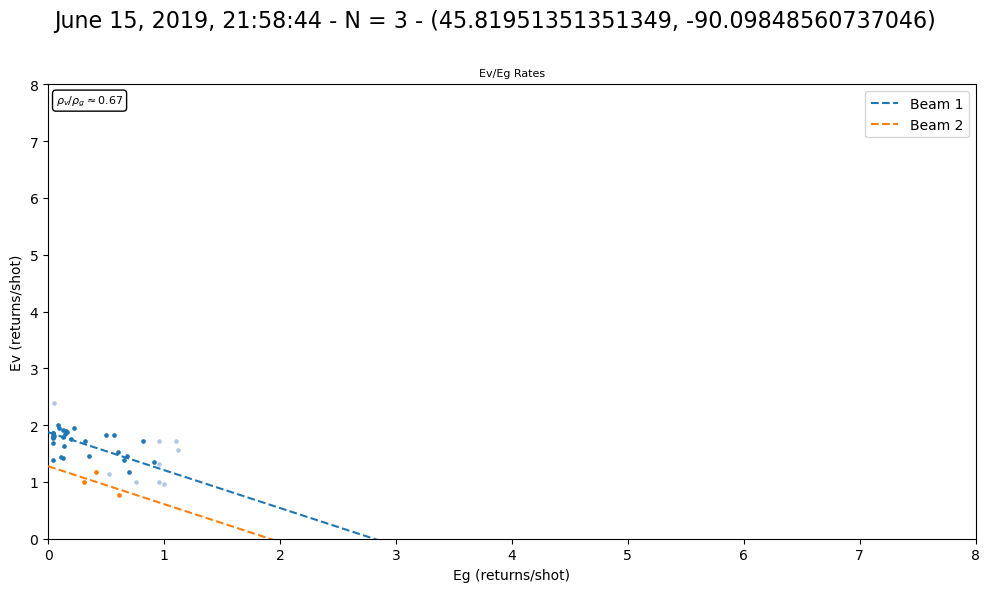

43
43
46
46


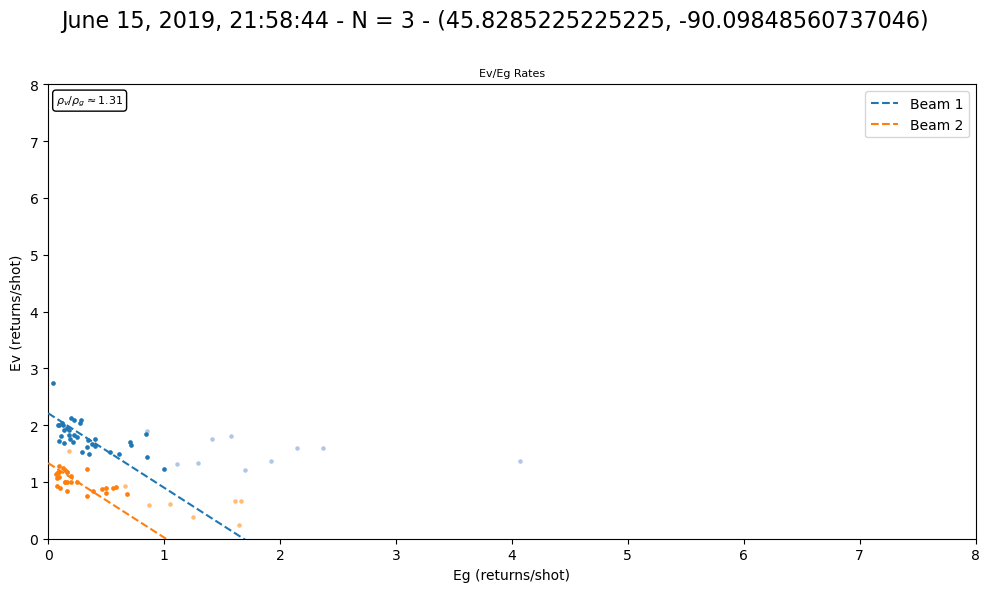

81
81


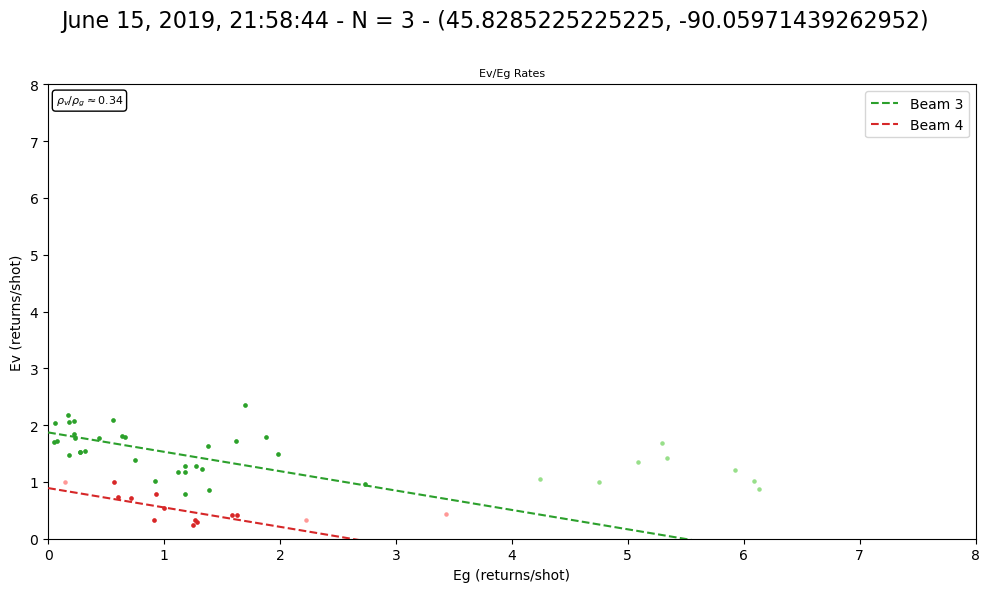

54
54
82
82


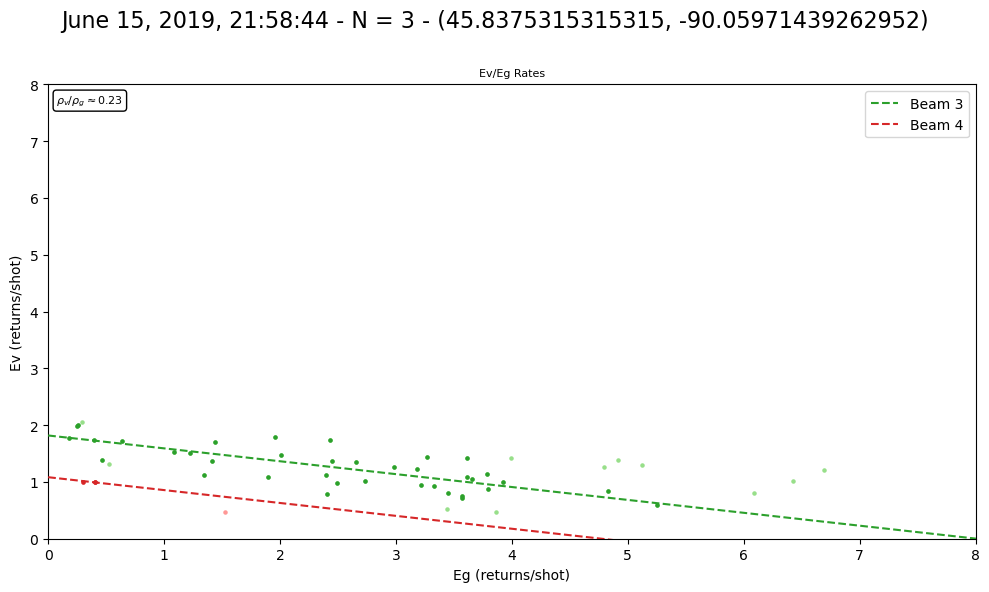

52
52


In [1]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-90.0791, 45.8060)

for i in [3]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=20, f_scale=.05,\
                         outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True, sat_flag=True, DW=1,
                         show_me_the_good_ones = 1)
    # print(data)

# Willow Creek - File 7

20
Nothing in rebinned section for willowcreek file 7's beam 1.
Nothing in rebinned section for willowcreek file 7's beam 2.
Nothing in rebinned section for willowcreek file 7's beam 3.
Nothing in rebinned section for willowcreek file 7's beam 4.
Beam 5, box 0 in willowcreek file 7 has no data.
Beam 5, box 1 in willowcreek file 7 has no data.
Beam 5, box 2 in willowcreek file 7 has no data.
Beam 5, box 3 in willowcreek file 7 has no data.
Beam 5, box 4 in willowcreek file 7 has no data.
Beam 5, box 5 in willowcreek file 7 has no data.
Beam 5, box 7 in willowcreek file 7 has no data.
Beam 5, box 8 in willowcreek file 7 has no data.
Beam 5, box 9 in willowcreek file 7 has no data.
Beam 5, box 10 in willowcreek file 7 has no data.
Beam 5, box 11 in willowcreek file 7 has no data.
Beam 5, box 12 in willowcreek file 7 has no data.
Beam 5, box 13 in willowcreek file 7 has no data.
Beam 5, box 15 in willowcreek file 7 has no data.
Beam 5, box 16 in willowcreek file 7 has no data.
Beam 5, box 

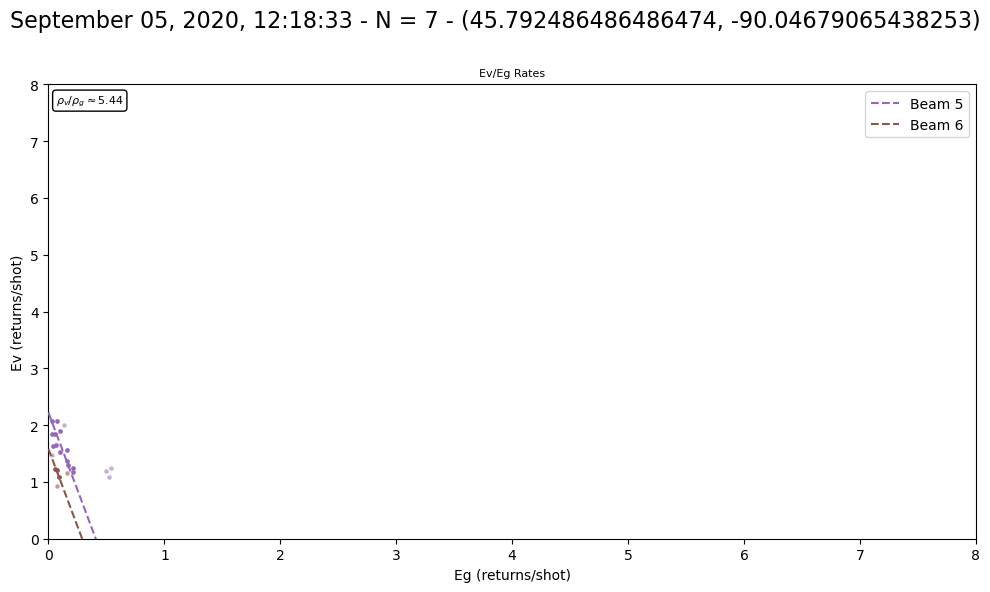

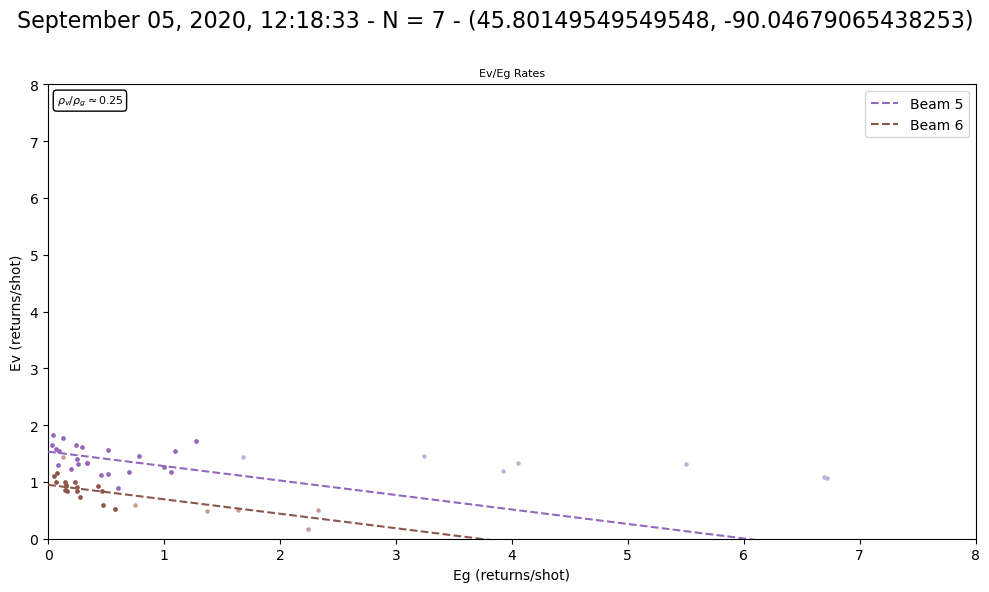

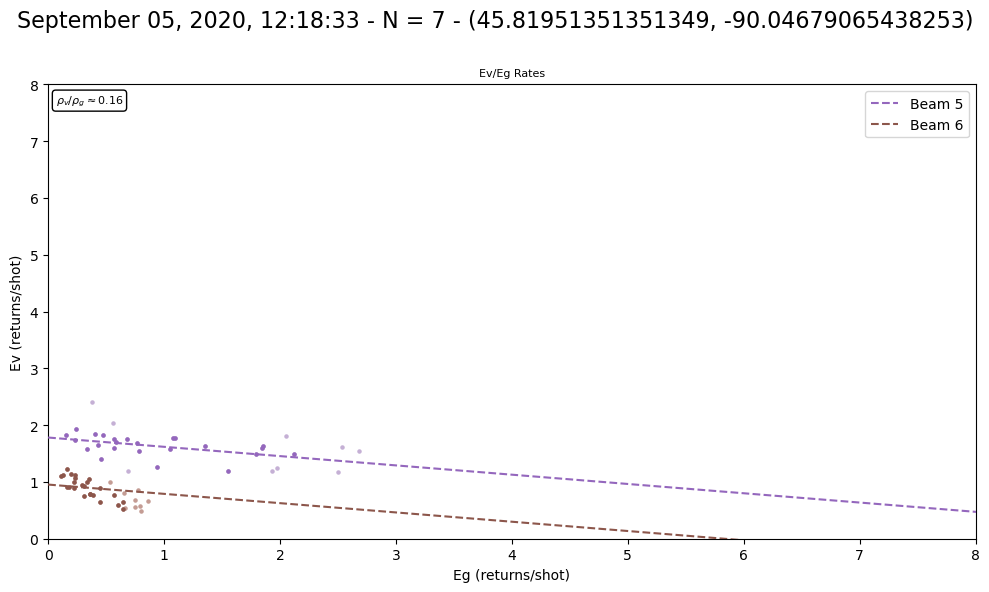

In [8]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-90.0791, 45.8060)

for i in [7]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.26,method='normal', landcover='forest', trim_atmospheric=True, sat_flag=True, DW=1,
                         show_me_the_good_ones = 1)
    # print(data)

# Old Jack Pine - File 4

28
Beam 1, box 0 in old_jack_pine file 4 has no data.
Beam 1, box 2 in old_jack_pine file 4 has no data.
Beam 1, box 3 in old_jack_pine file 4 has no data.
Beam 1, box 4 in old_jack_pine file 4 has no data.
Beam 1, box 5 in old_jack_pine file 4 has no data.
Beam 1, box 6 in old_jack_pine file 4 has no data.
Beam 1, box 7 in old_jack_pine file 4 has no data.
Beam 1, box 8 in old_jack_pine file 4 has no data.
Beam 1, box 9 in old_jack_pine file 4 has no data.
Beam 1, box 10 in old_jack_pine file 4 has no data.
Beam 1, box 11 in old_jack_pine file 4 has no data.
Beam 1, box 12 in old_jack_pine file 4 has no data.
Beam 1, box 13 in old_jack_pine file 4 has no data.
Beam 1, box 14 in old_jack_pine file 4 has no data.
Beam 1, box 15 in old_jack_pine file 4 has no data.
Beam 1, box 16 in old_jack_pine file 4 has no data.
Beam 1, box 17 in old_jack_pine file 4 has insufficient data.
Beam 1, box 18 in old_jack_pine file 4 has no data.
Beam 1, box 19 in old_jack_pine file 4 has no data.
Beam 1, 

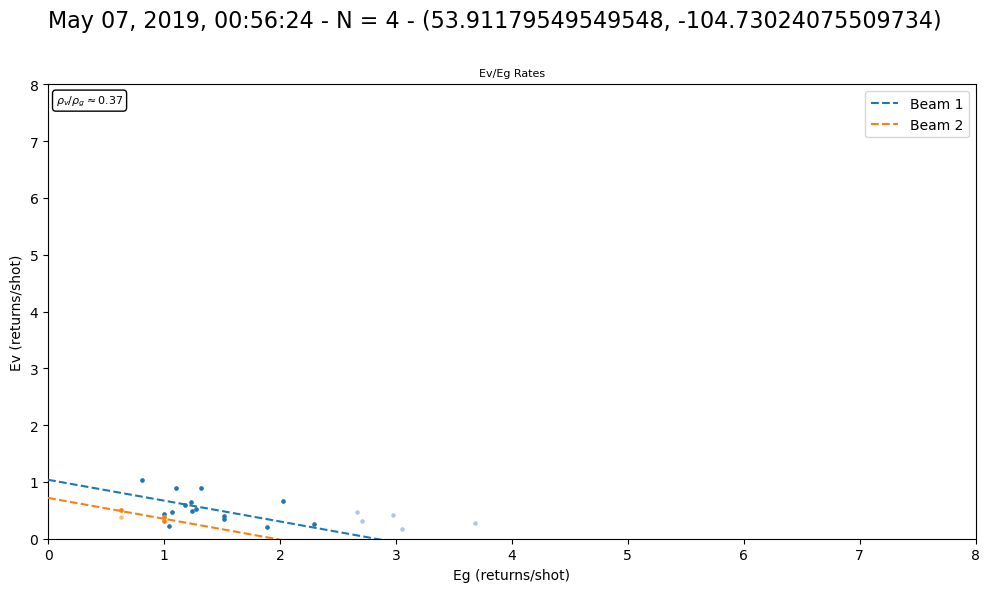

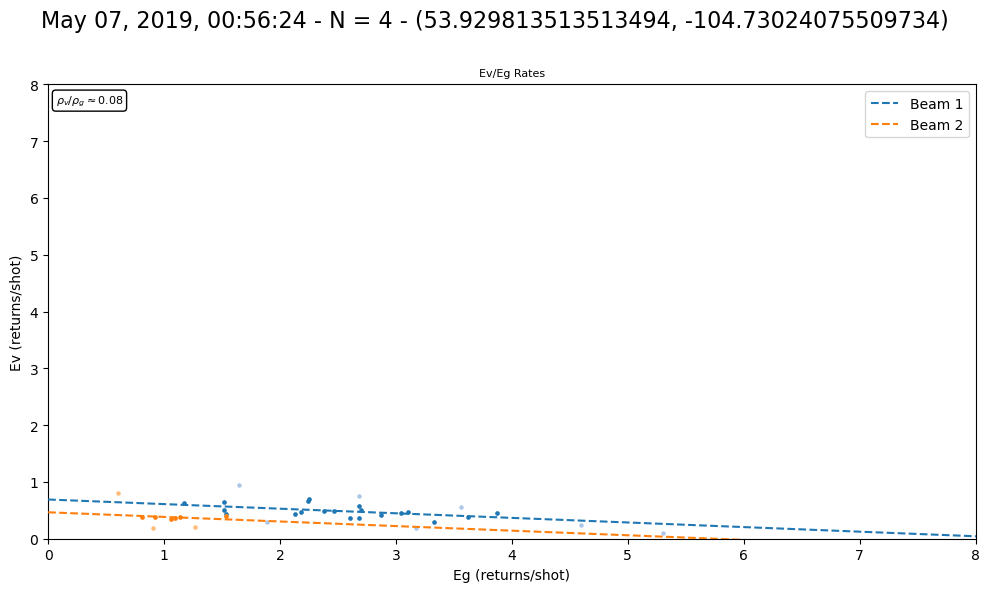

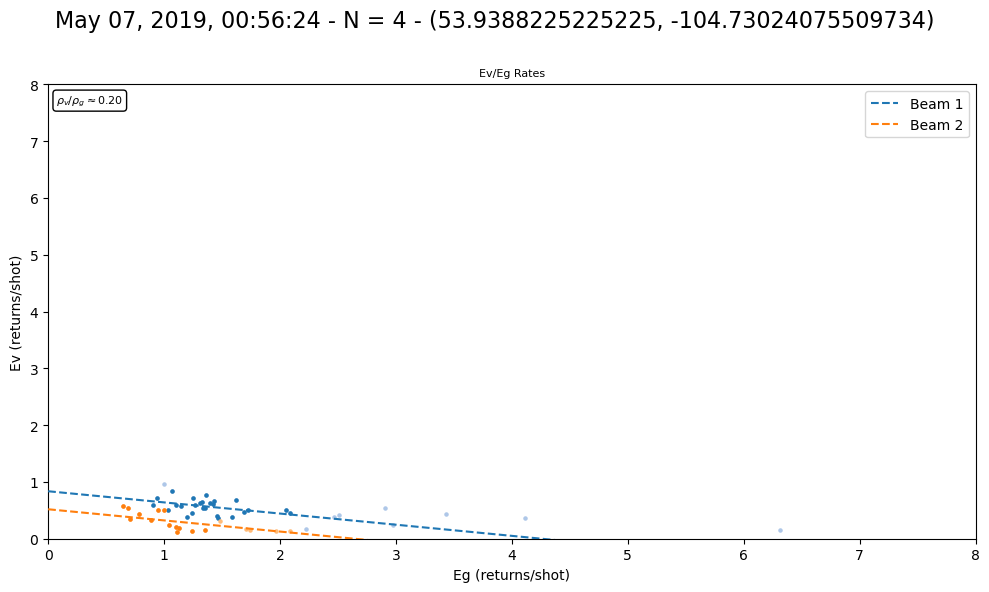

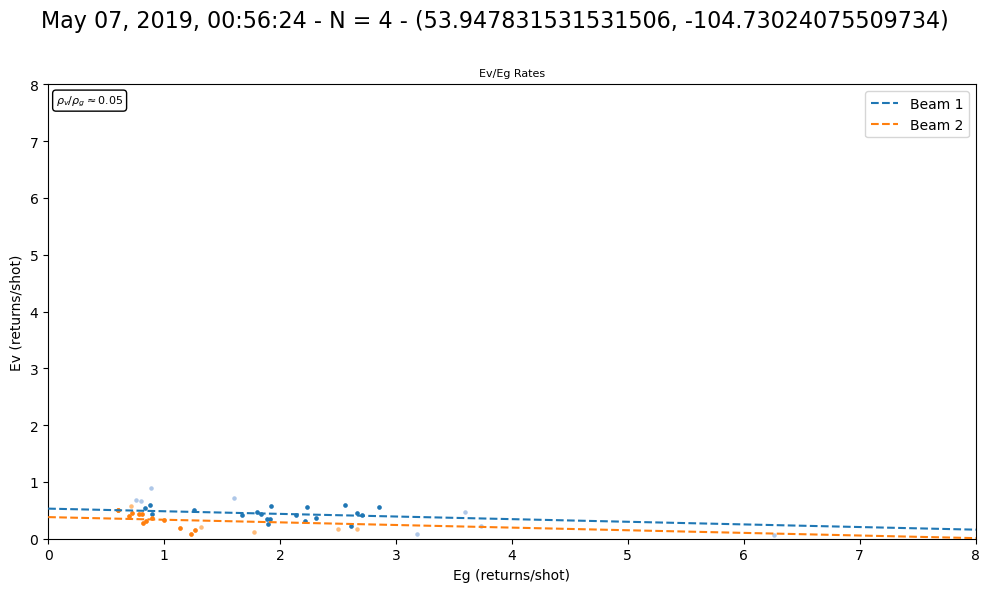

In [11]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/old_jack_pine/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-104.692,	53.9163)

for i in [4]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=451, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.26,method='normal', landcover='forest', trim_atmospheric=True, sat_flag=True, DW=1,
                         show_me_the_good_ones = 1)
    # print(data)

# Old Jack Pine - File 23

28
Beam 1, box 0 in old_jack_pine file 23 has no data.
Beam 1, box 1 in old_jack_pine file 23 has no data.
Beam 1, box 2 in old_jack_pine file 23 has no data.
Beam 1, box 3 in old_jack_pine file 23 has no data.
Beam 1, box 5 in old_jack_pine file 23 has no data.
Beam 1, box 6 in old_jack_pine file 23 has no data.
Beam 1, box 7 in old_jack_pine file 23 has no data.
Beam 1, box 8 in old_jack_pine file 23 has no data.
Beam 1, box 9 in old_jack_pine file 23 has no data.
Beam 1, box 10 in old_jack_pine file 23 has no data.
Beam 1, box 11 in old_jack_pine file 23 has no data.
Beam 1, box 13 in old_jack_pine file 23 has no data.
Beam 1, box 14 in old_jack_pine file 23 has no data.
Beam 1, box 15 in old_jack_pine file 23 has no data.
Beam 1, box 16 in old_jack_pine file 23 has no data.
Beam 1, box 17 in old_jack_pine file 23 has no data.
Beam 1, box 18 in old_jack_pine file 23 has no data.
Beam 1, box 19 in old_jack_pine file 23 has no data.
Beam 1, box 21 in old_jack_pine file 23 has no data.

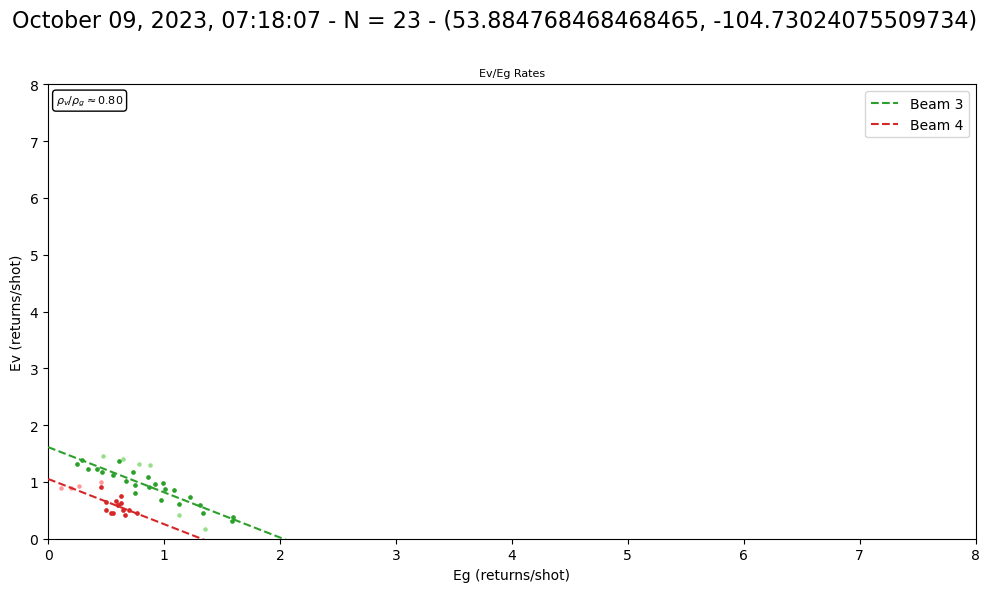

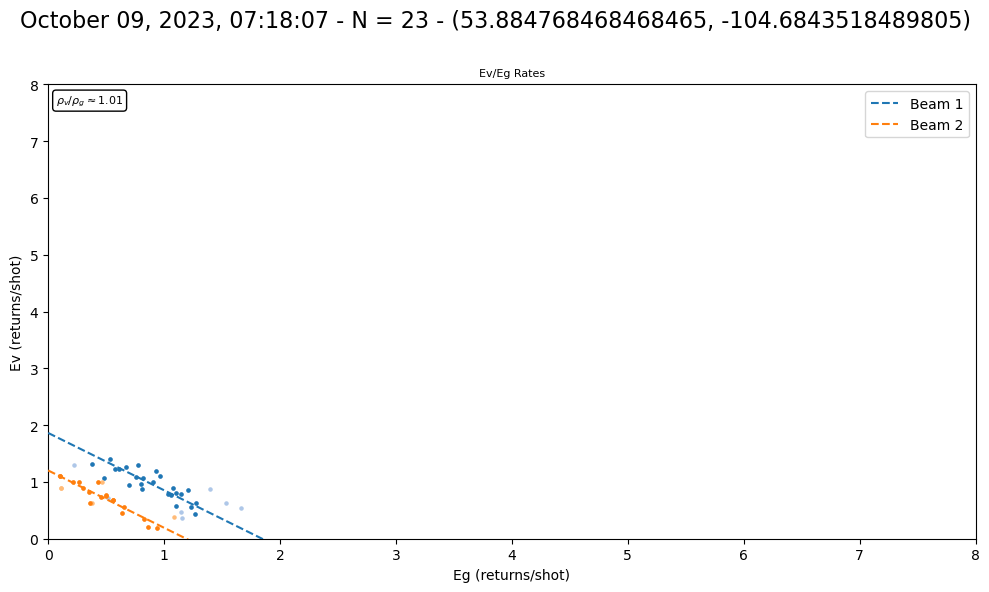

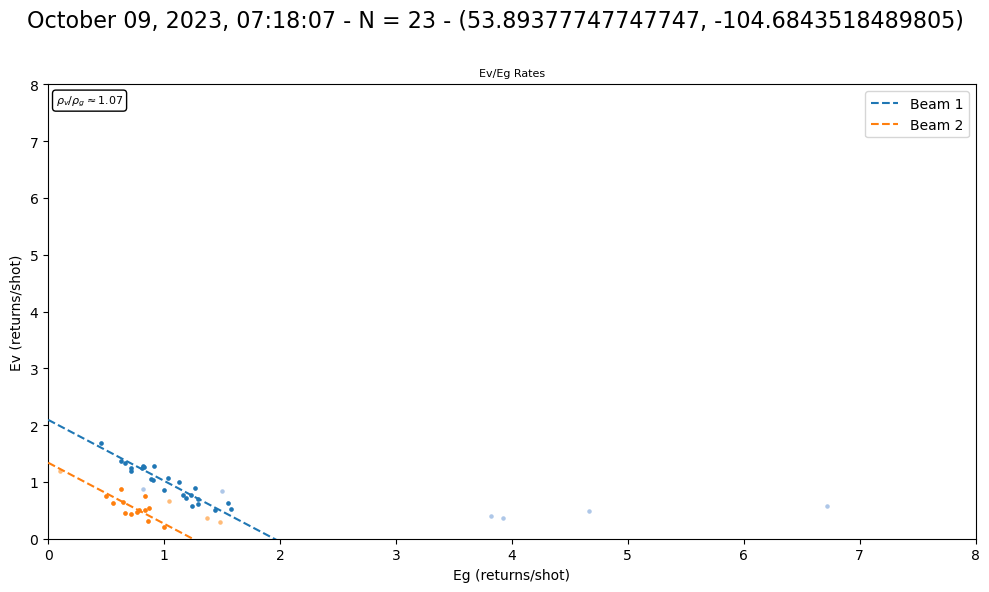

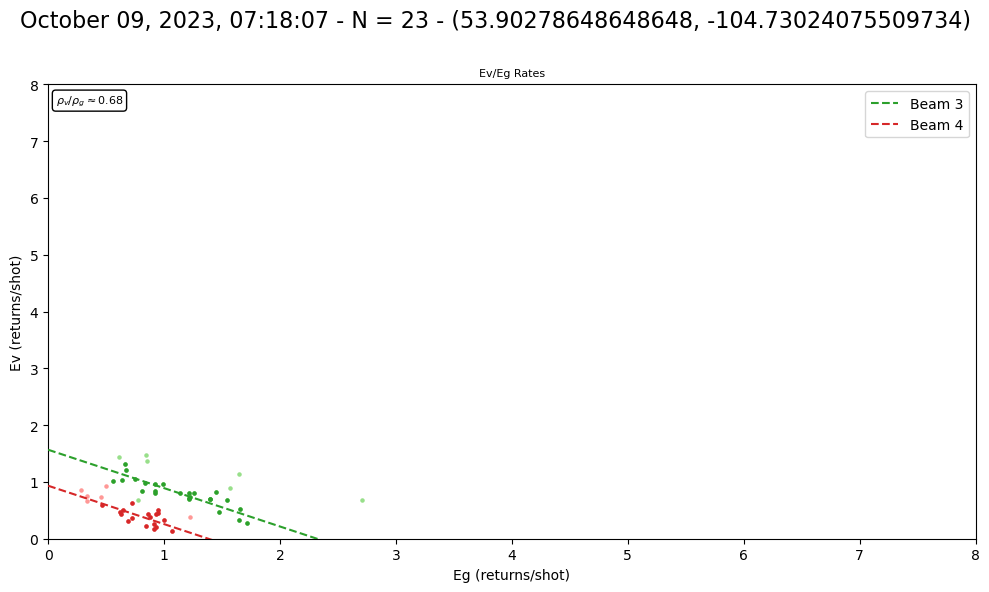

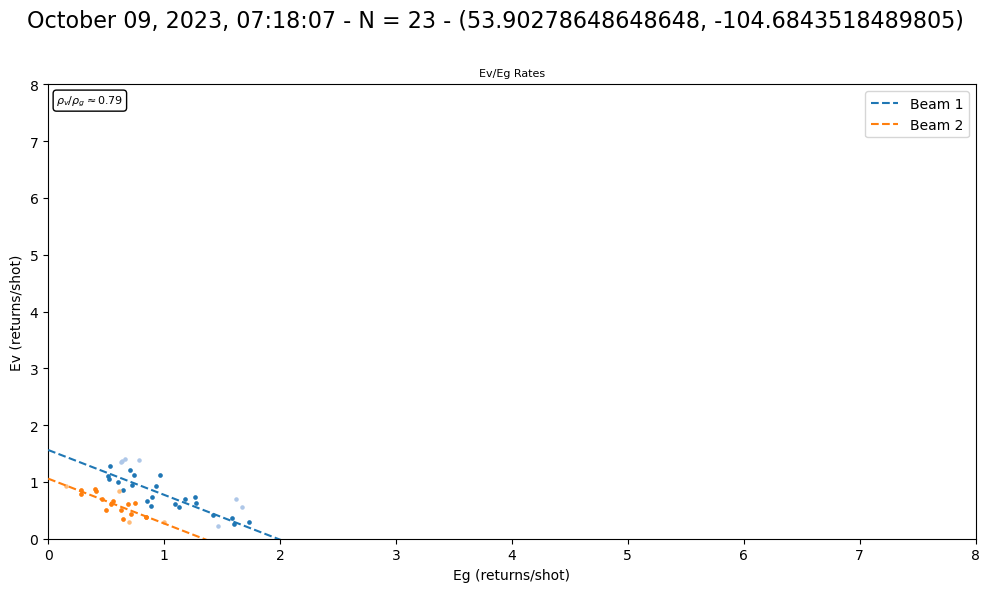

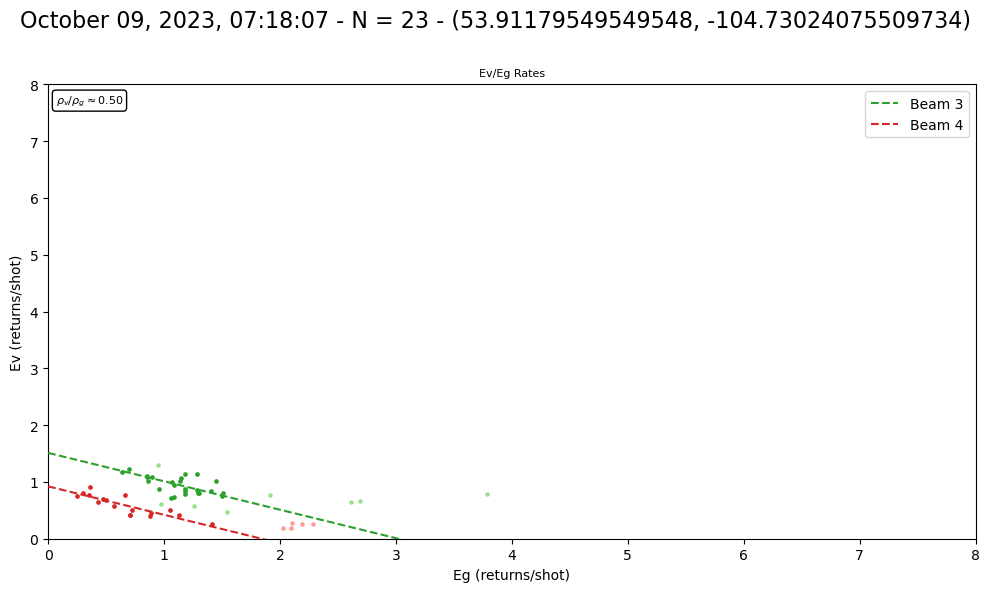

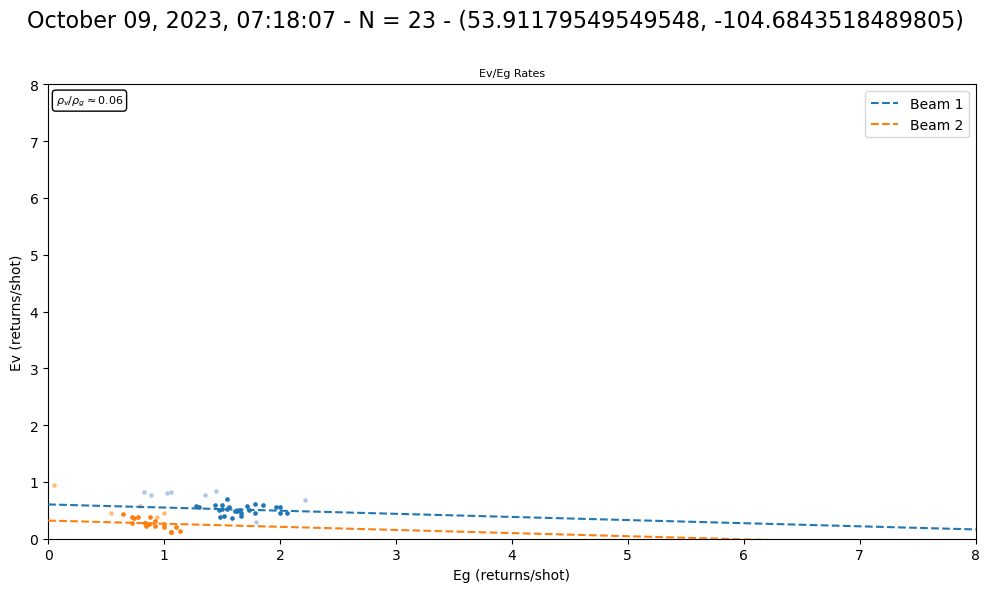

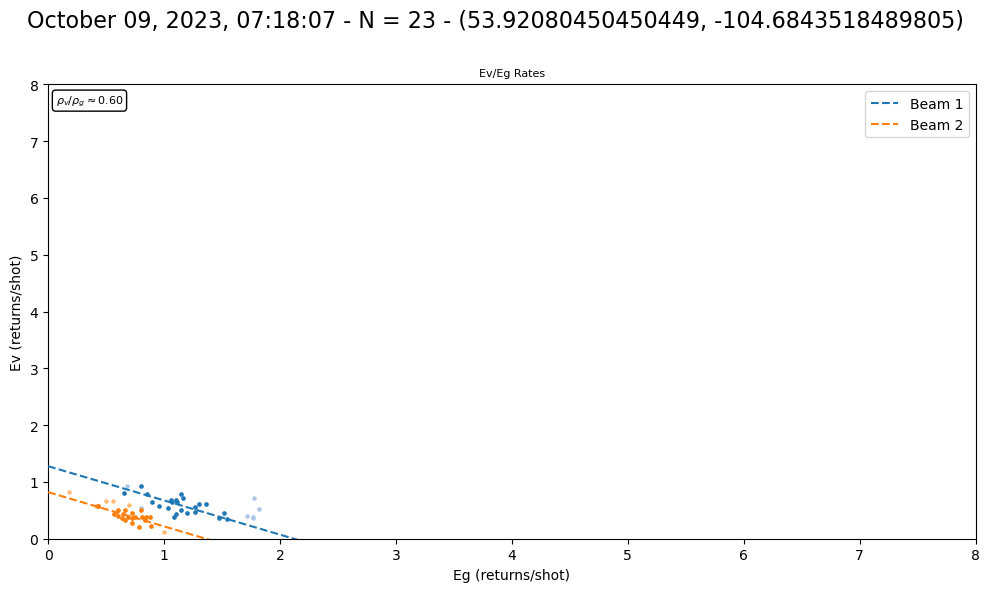

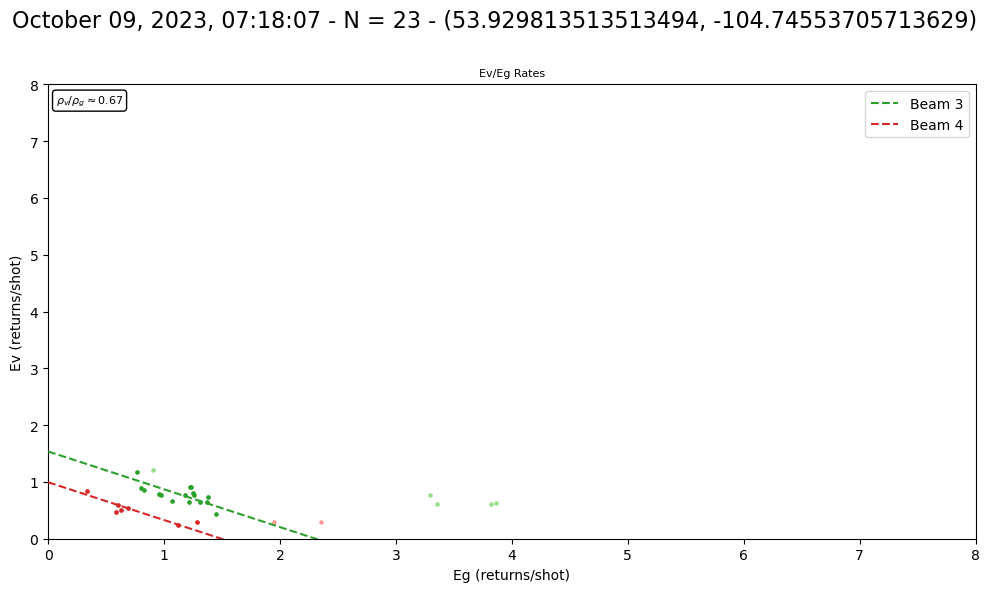

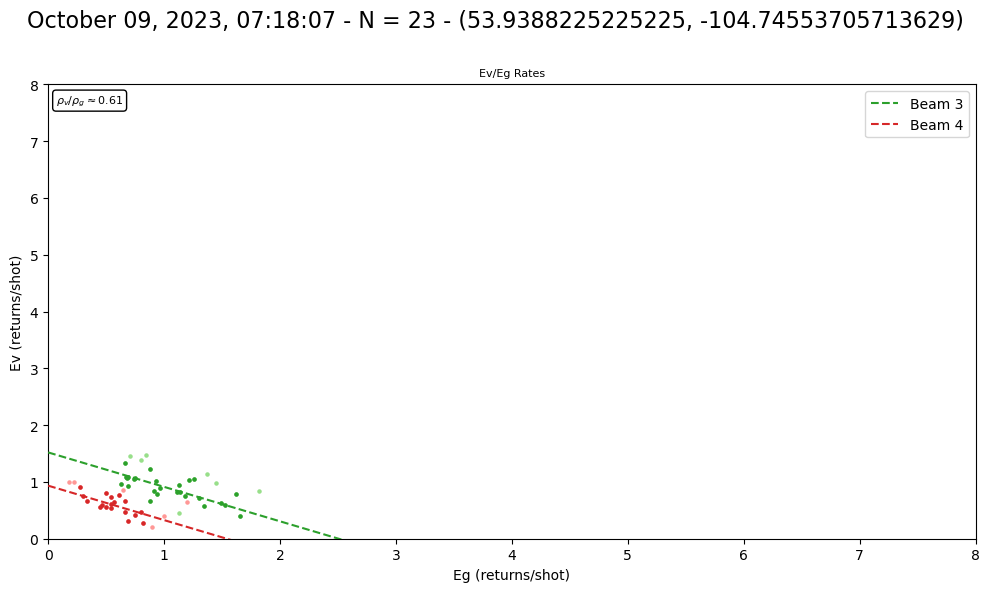

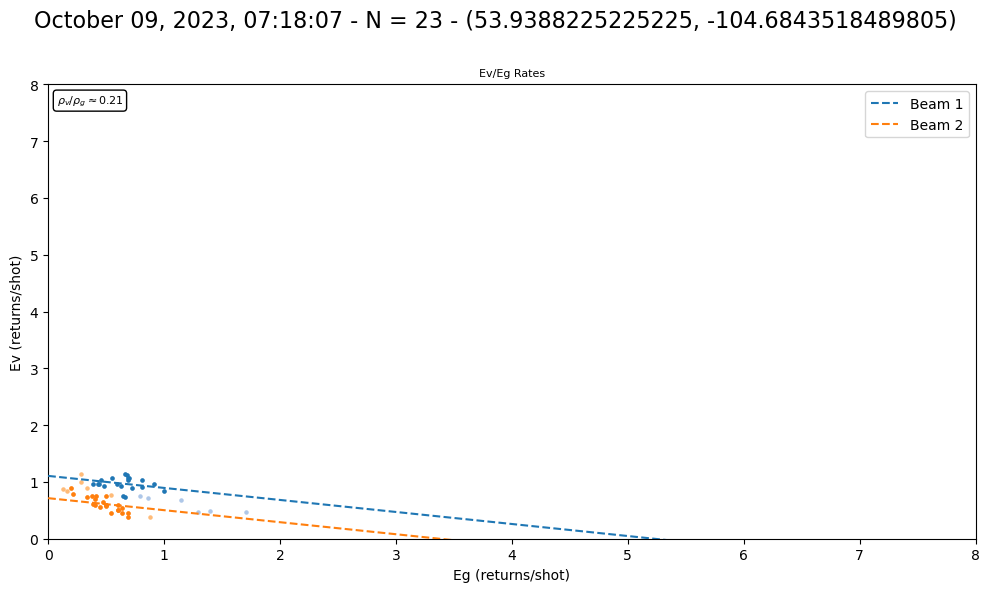

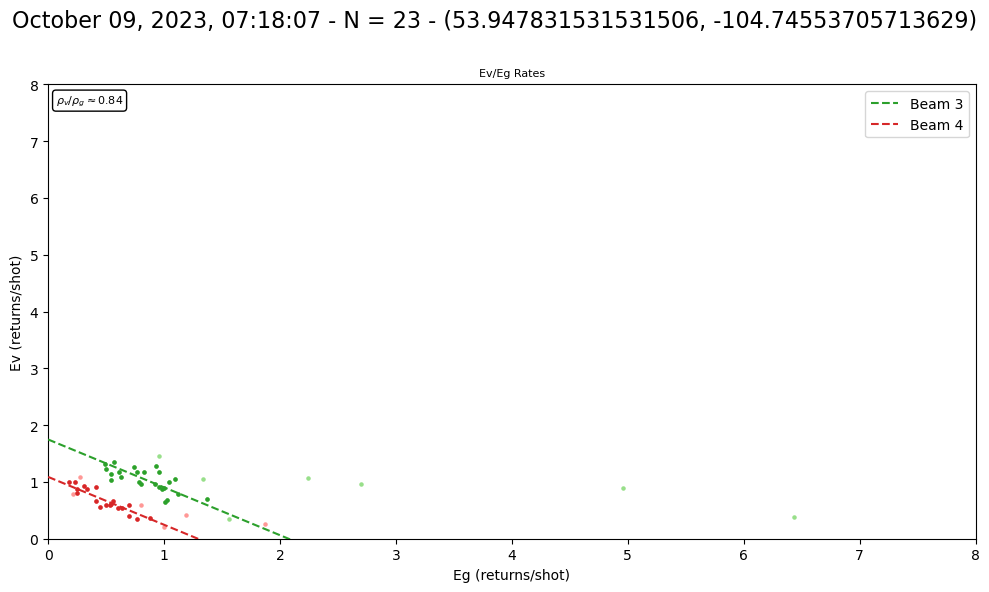

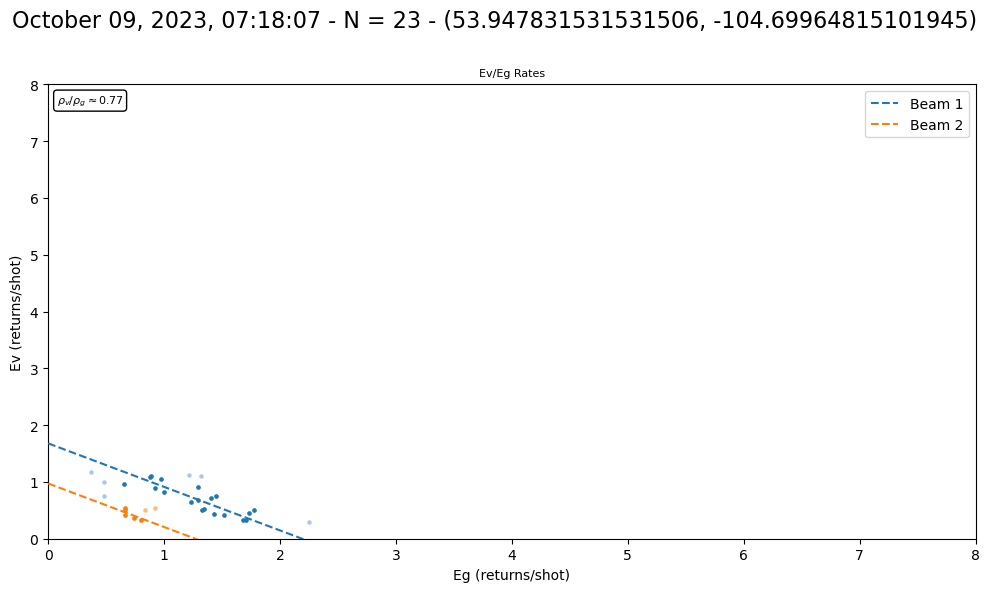

In [15]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/old_jack_pine/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-104.692,	53.9163)

for i in [23]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=451, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True, sat_flag=True, DW=1,
                         show_me_the_good_ones = 1)
    # print(data)

# Fractional Snow Cover

In [9]:
df.columns

Index(['camera', 'date', 'lon', 'lat', 'pvpg', 'pv', 'pg', 'Eg', 'Ev',
       'data_quantity', 'data_quality', 'altitude', 'pv_ratio_mean',
       'pv_ratio_max', 'trad_cc', 'beam', 'beam_str', 'msw_flag', 'night_flag',
       'asr', 'canopy_openness', 'snr', 'segment_cover', 'segment_landcover',
       'h_te_interp', 'h_te_std', 'terrain_slope', 'longitude', 'latitude',
       'cloud_flag_atm', 'layer_flag', 'FSC', 'TreeSnow', 'file_index'],
      dtype='object')

/tmp/ipykernel_2209507/2618204098.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('FSC', inplace=True)


delta_junction, FSC = 0.2
Nothing in rebinned section for delta_junction file 16's beam 1.
Nothing in rebinned section for delta_junction file 16's beam 2.
Nothing in rebinned section for delta_junction file 16's beam 5.
Nothing in rebinned section for delta_junction file 16's beam 6.


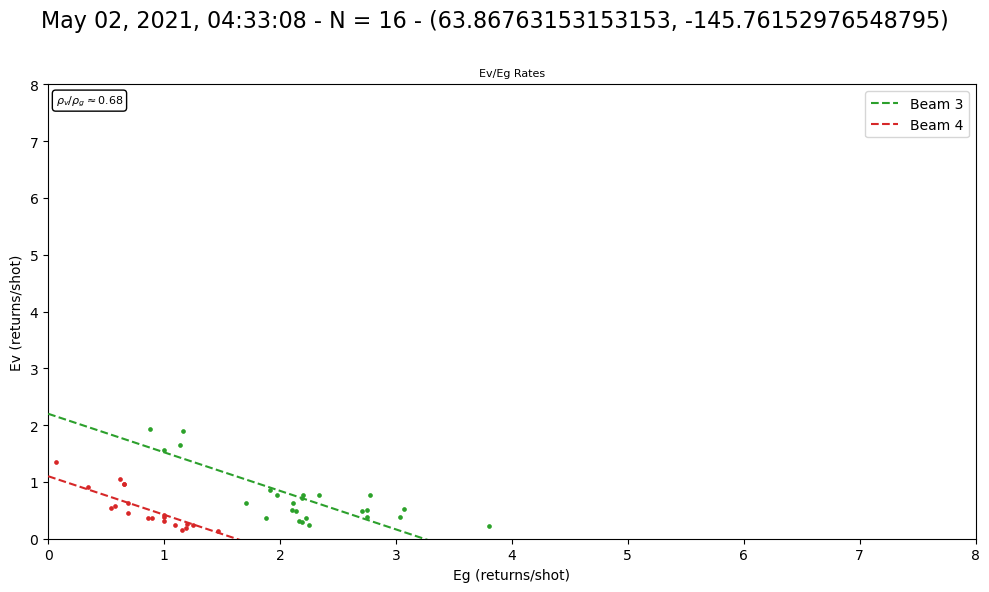

delta_junction, FSC = 0.2
Nothing in rebinned section for delta_junction file 16's beam 1.
Nothing in rebinned section for delta_junction file 16's beam 2.
Nothing in rebinned section for delta_junction file 16's beam 5.
Nothing in rebinned section for delta_junction file 16's beam 6.
delta_junction, FSC = 0.2
Nothing in rebinned section for delta_junction file 32's beam 3.
Nothing in rebinned section for delta_junction file 32's beam 4.
Nothing in rebinned section for delta_junction file 32's beam 5.
Nothing in rebinned section for delta_junction file 32's beam 6.


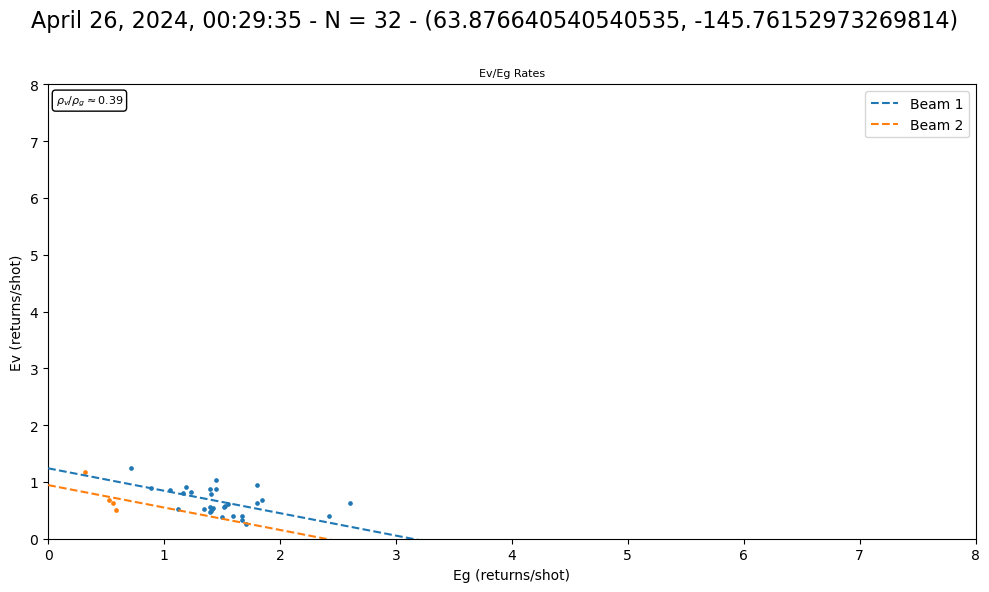

lacclair, FSC = 0.3
Nothing in rebinned section for lacclair file 12's beam 1.
Nothing in rebinned section for lacclair file 12's beam 2.
Nothing in rebinned section for lacclair file 12's beam 3.
Nothing in rebinned section for lacclair file 12's beam 4.


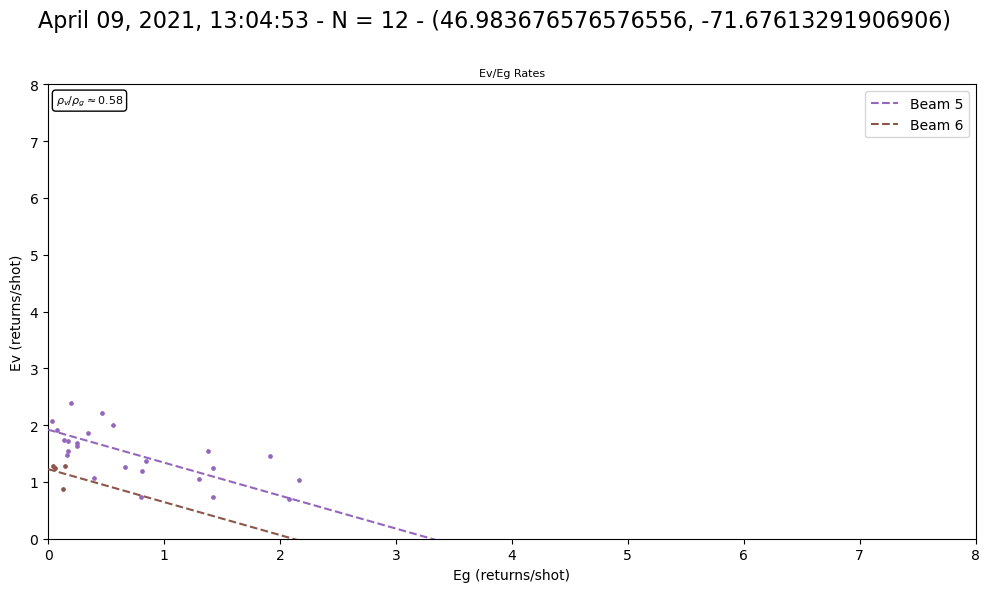

lacclair, FSC = 0.3
Nothing in rebinned section for lacclair file 12's beam 1.
Nothing in rebinned section for lacclair file 12's beam 2.
Nothing in rebinned section for lacclair file 12's beam 3.
Nothing in rebinned section for lacclair file 12's beam 4.


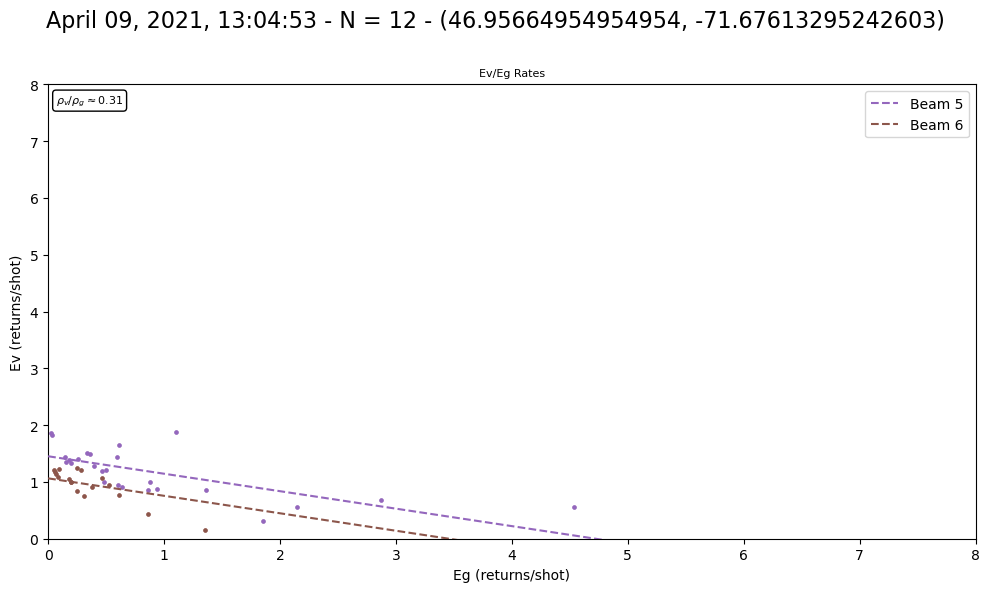

lacclair, FSC = 0.3
Nothing in rebinned section for lacclair file 12's beam 1.
Nothing in rebinned section for lacclair file 12's beam 2.
Nothing in rebinned section for lacclair file 12's beam 3.
Nothing in rebinned section for lacclair file 12's beam 4.


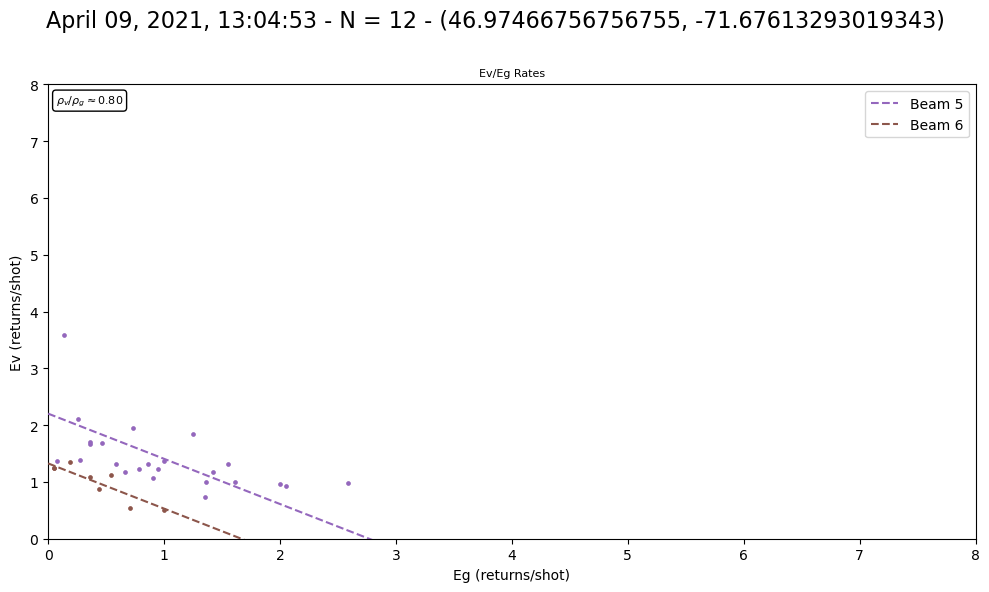

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 5.
Nothing in rebinned section for oregon_yp file 0's beam 6.


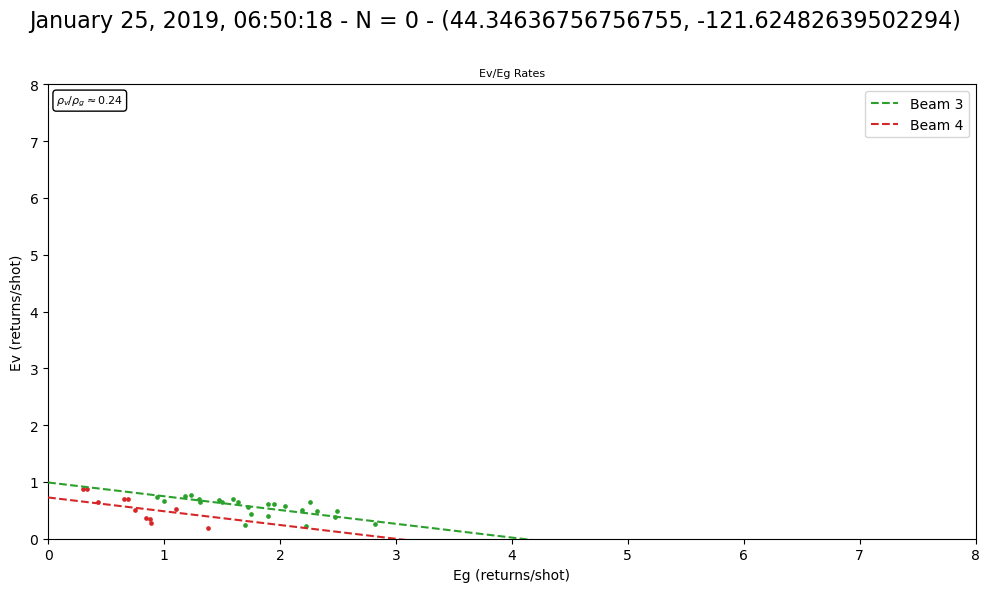

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.


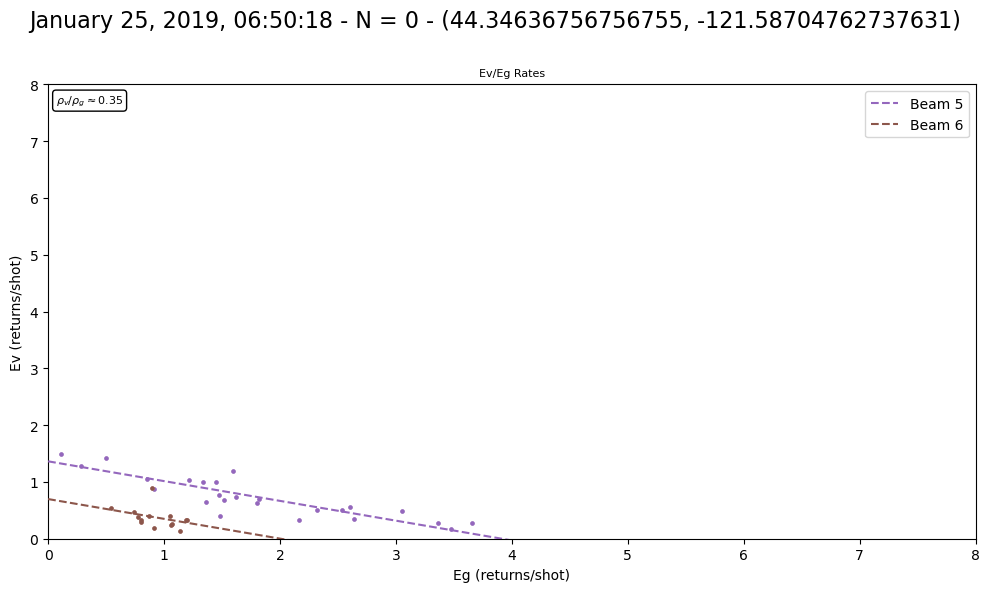

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 5.
Nothing in rebinned section for oregon_yp file 0's beam 6.


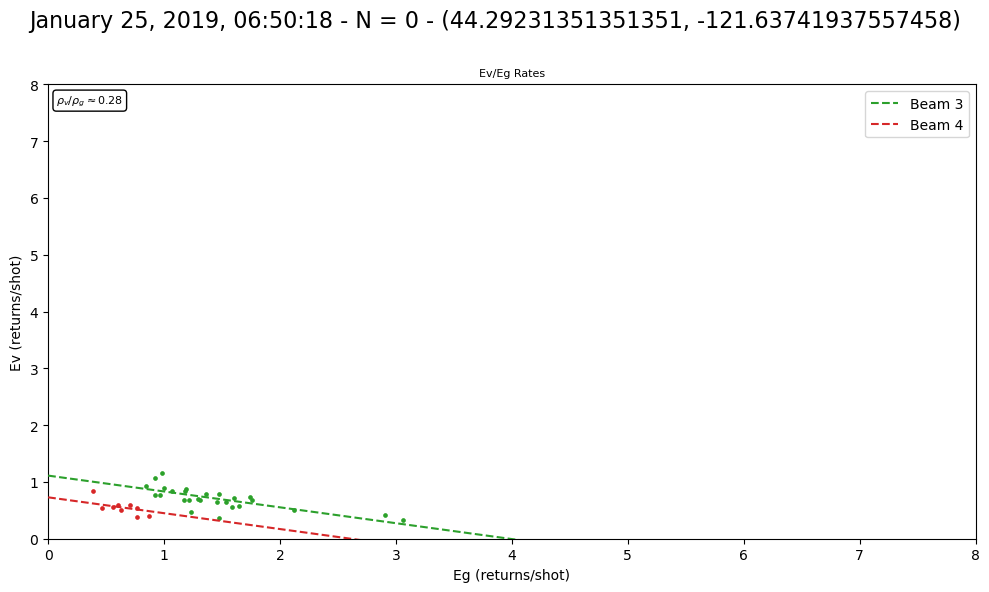

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.


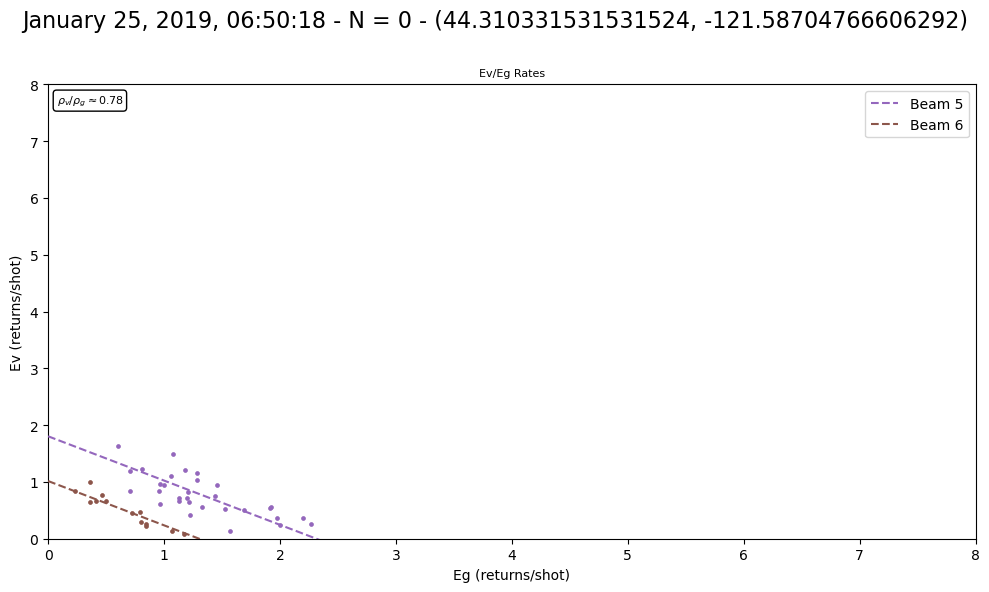

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.


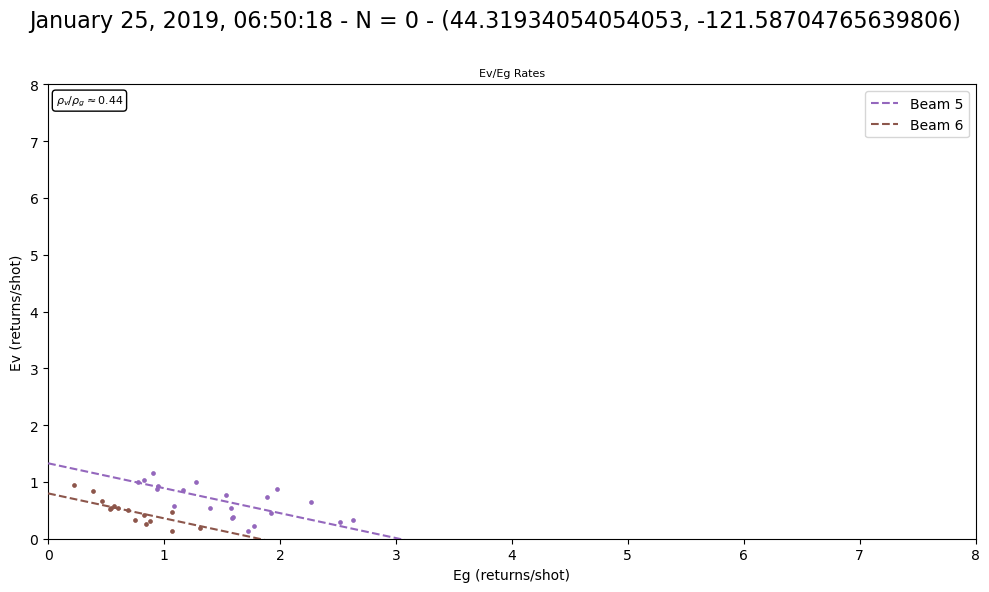

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.


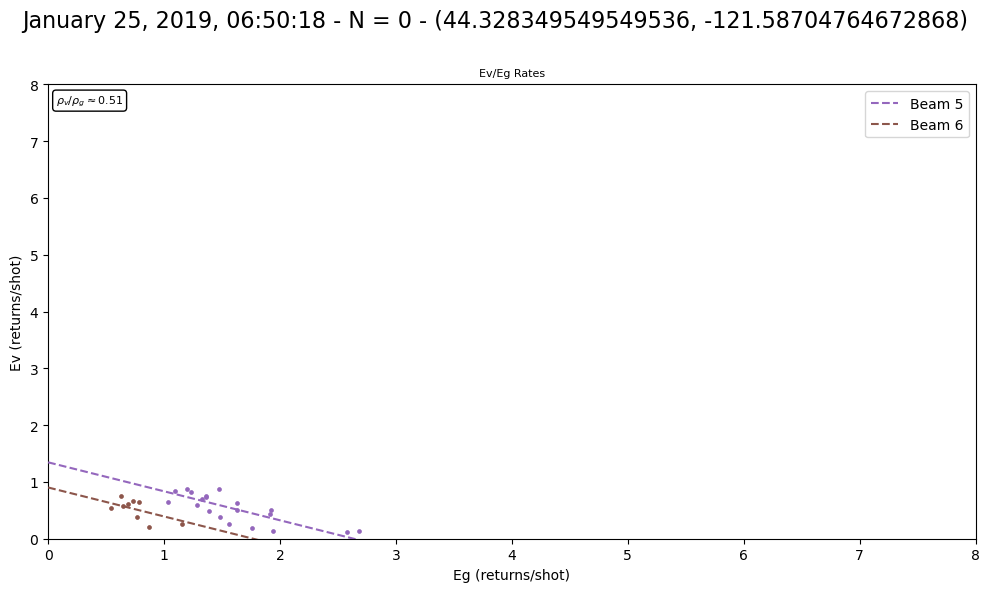

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 5.
Nothing in rebinned section for oregon_yp file 0's beam 6.


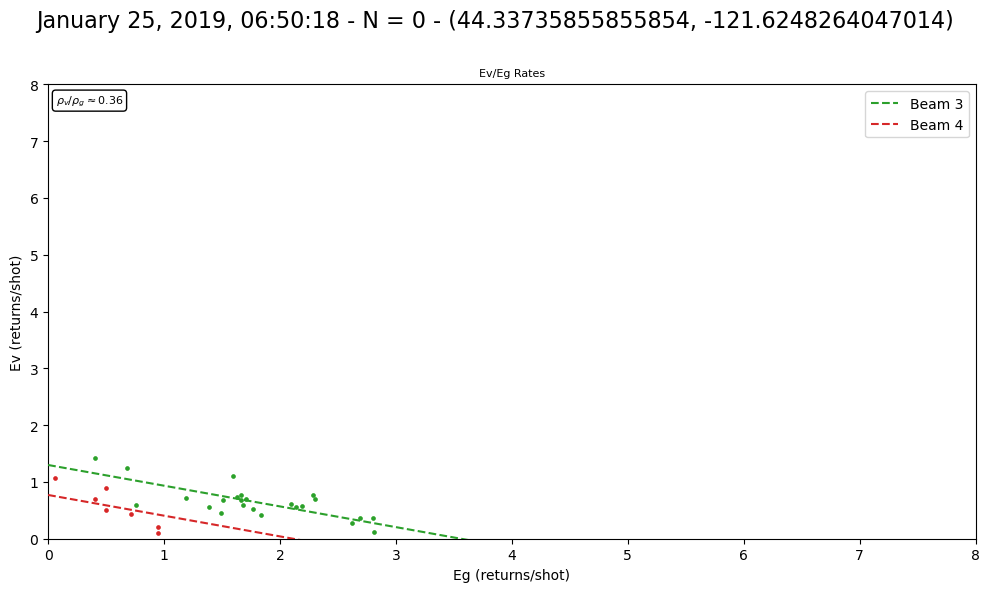

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.


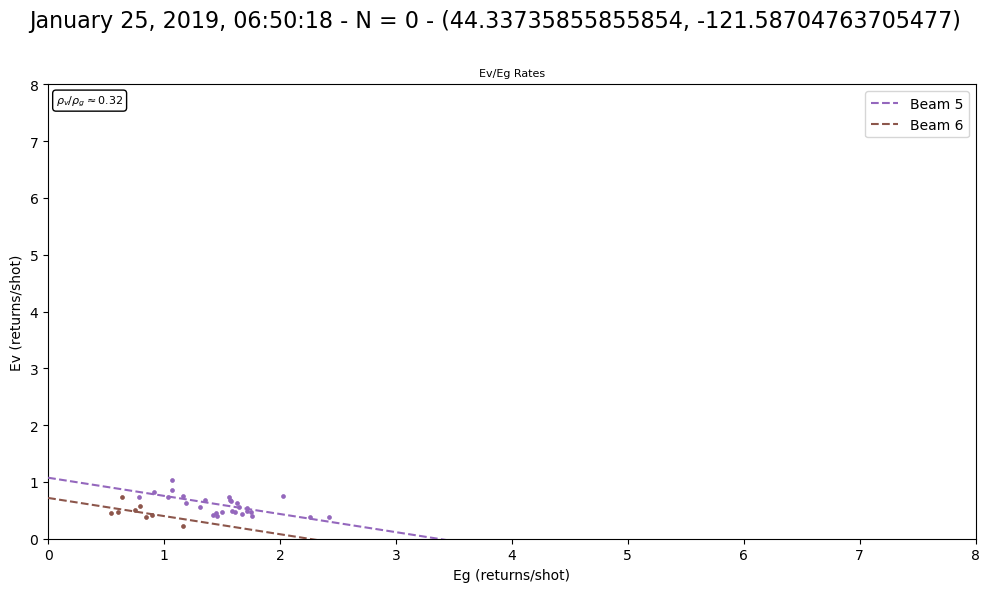

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.


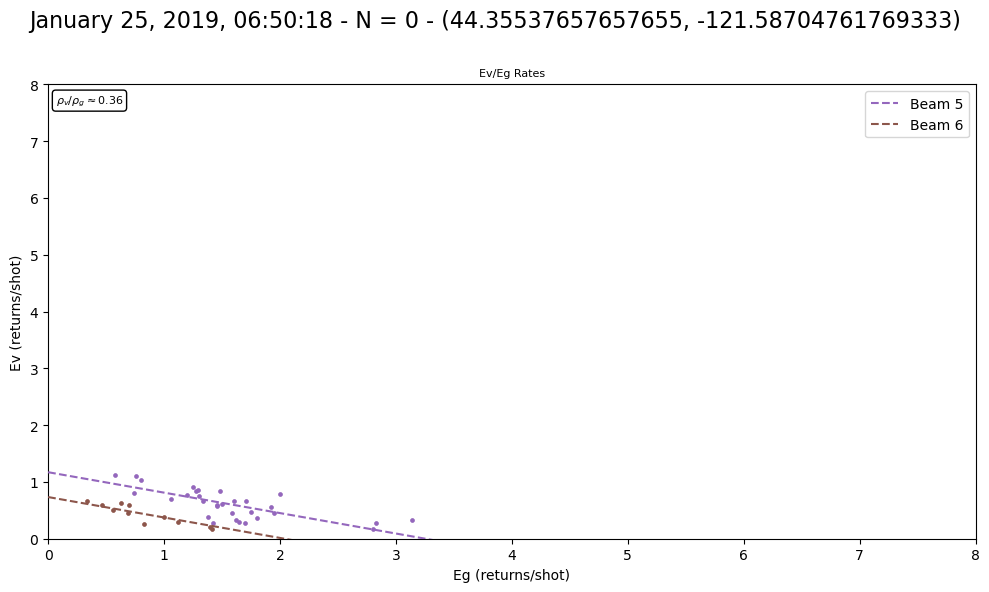

oregon_yp, FSC = 0.32
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 5.
Nothing in rebinned section for oregon_yp file 0's beam 6.


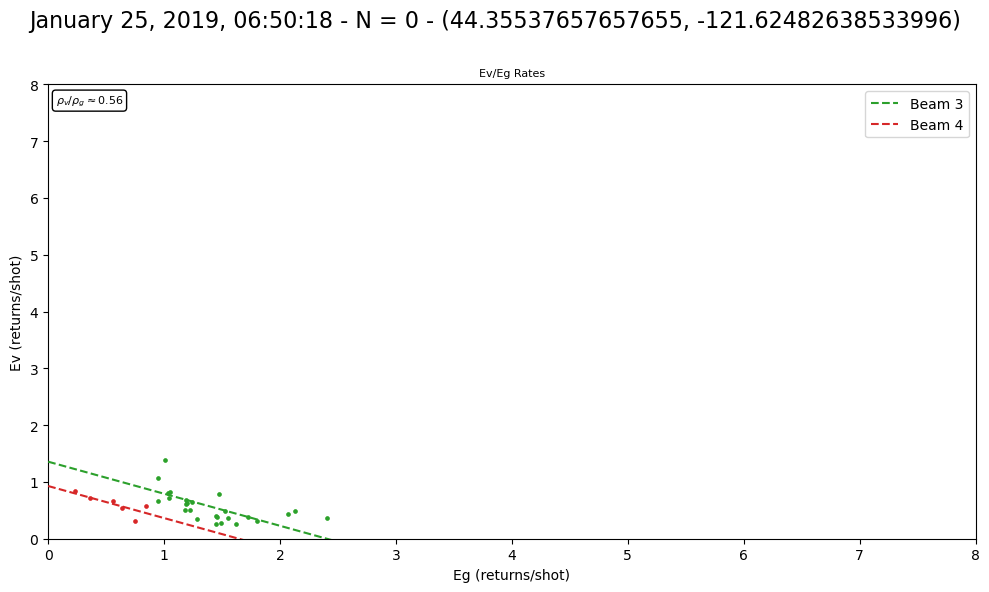

old_jack_pine, FSC = 0.33
Nothing in rebinned section for old_jack_pine file 3's beam 1.
Nothing in rebinned section for old_jack_pine file 3's beam 2.
Nothing in rebinned section for old_jack_pine file 3's beam 5.
Nothing in rebinned section for old_jack_pine file 3's beam 6.


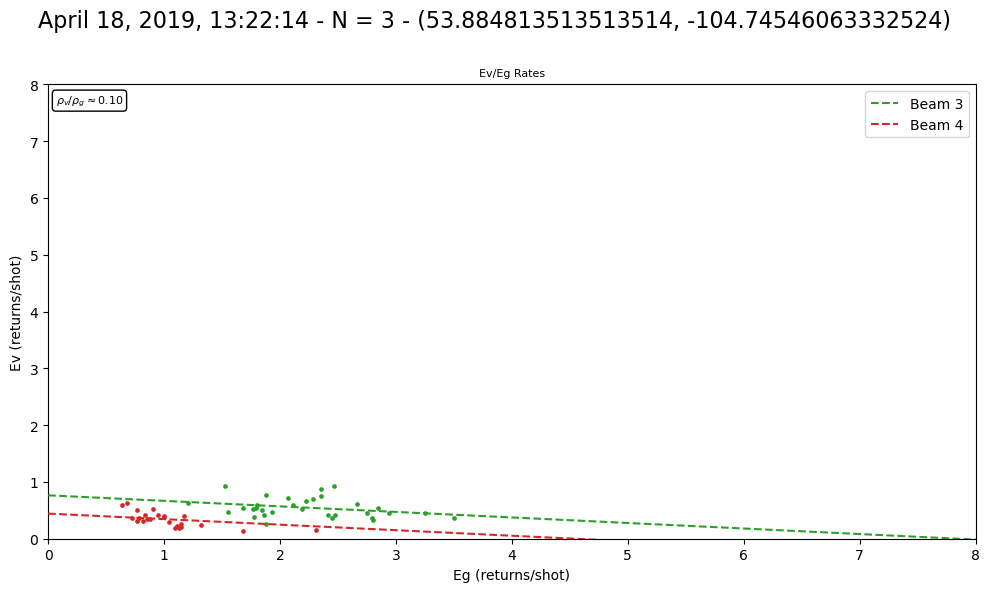

old_jack_pine, FSC = 0.33
Nothing in rebinned section for old_jack_pine file 3's beam 3.
Nothing in rebinned section for old_jack_pine file 3's beam 4.
Nothing in rebinned section for old_jack_pine file 3's beam 5.
Nothing in rebinned section for old_jack_pine file 3's beam 6.
old_jack_pine, FSC = 0.33
Nothing in rebinned section for old_jack_pine file 3's beam 3.
Nothing in rebinned section for old_jack_pine file 3's beam 4.
Nothing in rebinned section for old_jack_pine file 3's beam 5.
Nothing in rebinned section for old_jack_pine file 3's beam 6.


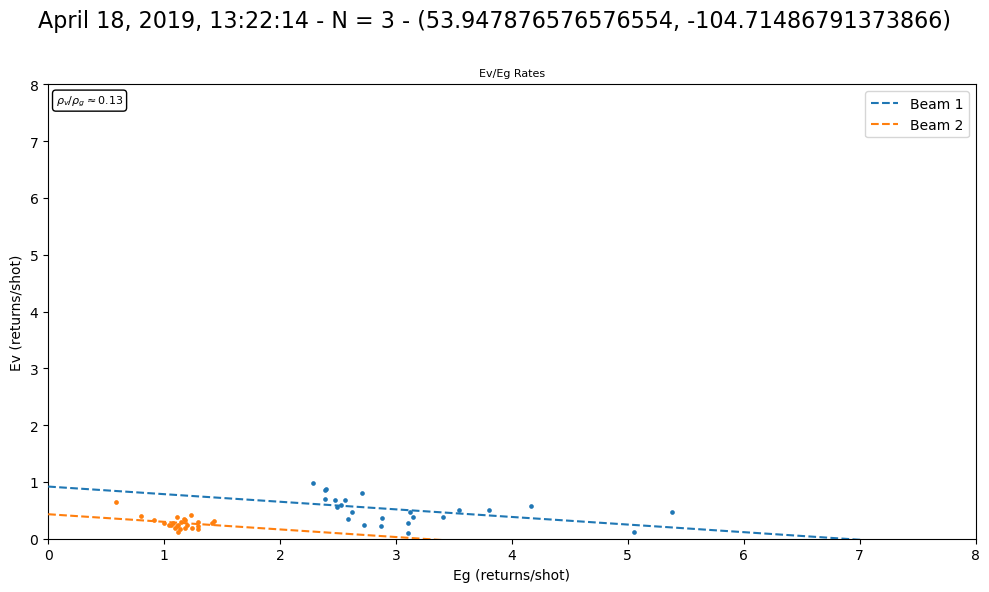

old_jack_pine, FSC = 0.33
Nothing in rebinned section for old_jack_pine file 3's beam 3.
Nothing in rebinned section for old_jack_pine file 3's beam 4.
Nothing in rebinned section for old_jack_pine file 3's beam 5.
Nothing in rebinned section for old_jack_pine file 3's beam 6.
old_jack_pine, FSC = 0.33
Nothing in rebinned section for old_jack_pine file 3's beam 3.
Nothing in rebinned section for old_jack_pine file 3's beam 4.
Nothing in rebinned section for old_jack_pine file 3's beam 5.
Nothing in rebinned section for old_jack_pine file 3's beam 6.


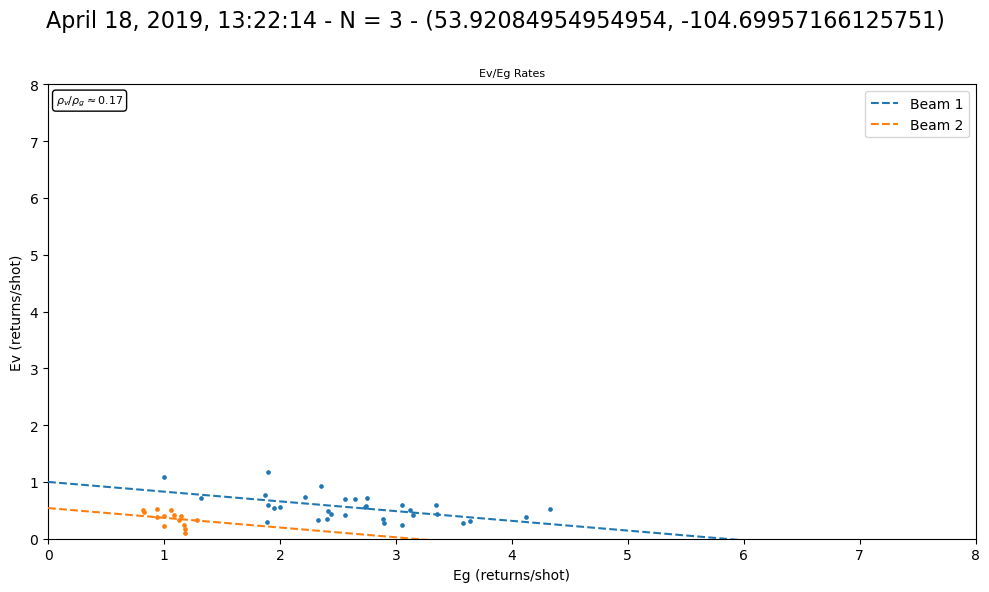

old_jack_pine, FSC = 0.33
Nothing in rebinned section for old_jack_pine file 3's beam 3.
Nothing in rebinned section for old_jack_pine file 3's beam 4.
Nothing in rebinned section for old_jack_pine file 3's beam 5.
Nothing in rebinned section for old_jack_pine file 3's beam 6.


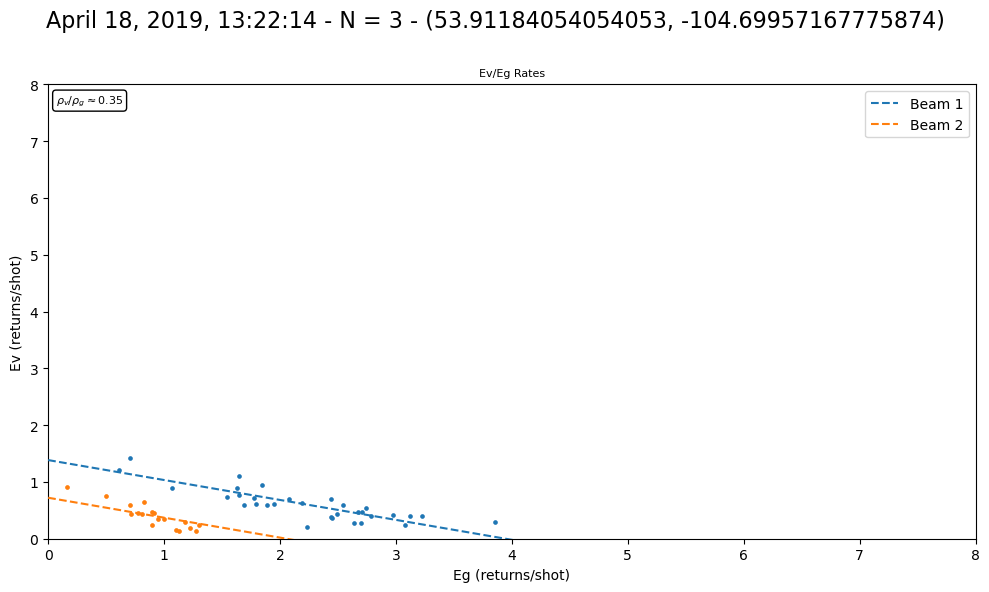

delta_junction, FSC = 0.35
Nothing in rebinned section for delta_junction file 8's beam 3.
Nothing in rebinned section for delta_junction file 8's beam 4.
Nothing in rebinned section for delta_junction file 8's beam 5.
Nothing in rebinned section for delta_junction file 8's beam 6.


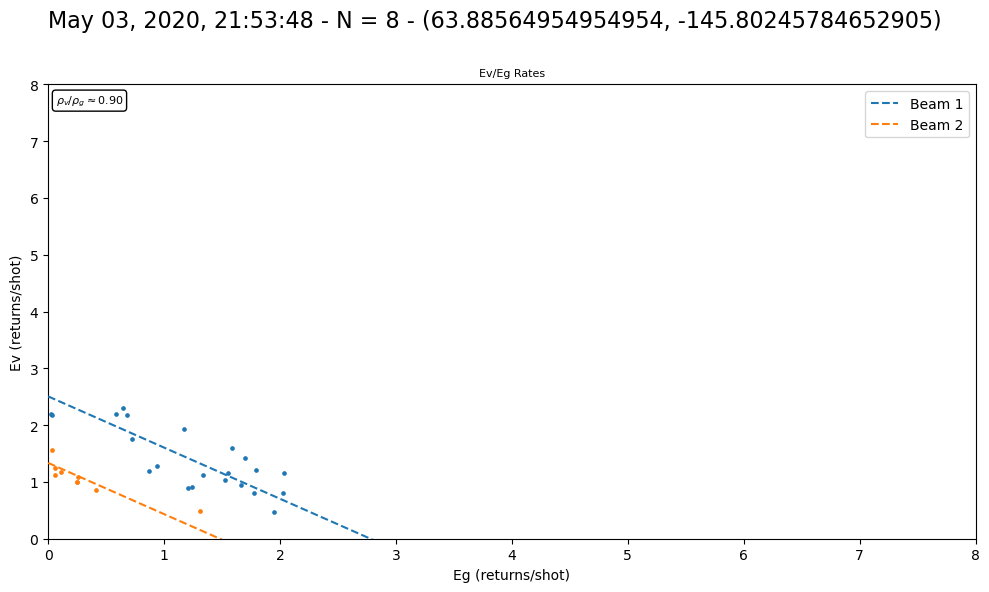

delta_junction, FSC = 0.35
Nothing in rebinned section for delta_junction file 8's beam 3.
Nothing in rebinned section for delta_junction file 8's beam 4.
Nothing in rebinned section for delta_junction file 8's beam 5.
Nothing in rebinned section for delta_junction file 8's beam 6.


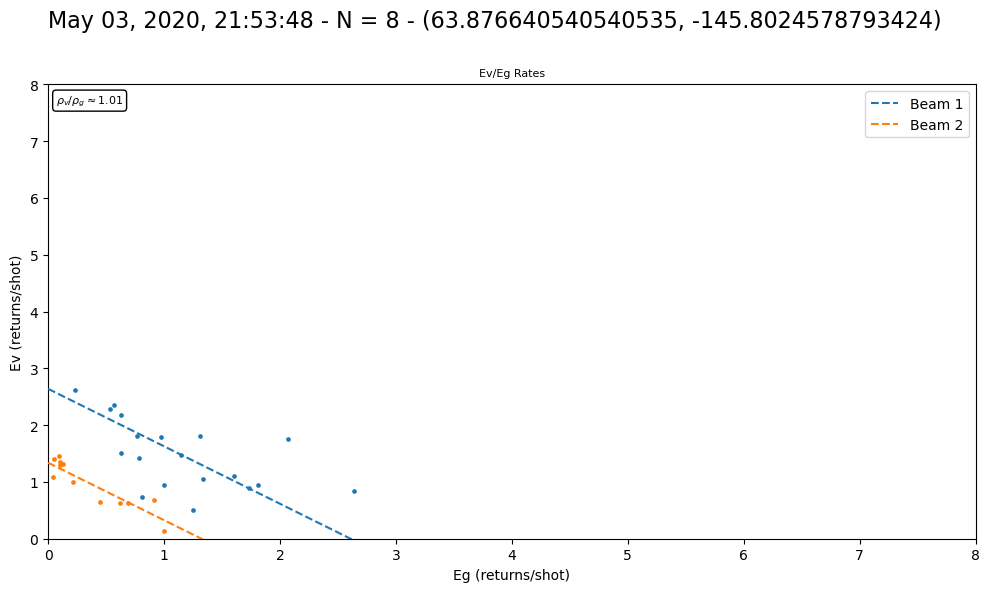

delta_junction, FSC = 0.35
Nothing in rebinned section for delta_junction file 8's beam 3.
Nothing in rebinned section for delta_junction file 8's beam 4.
Nothing in rebinned section for delta_junction file 8's beam 5.
Nothing in rebinned section for delta_junction file 8's beam 6.


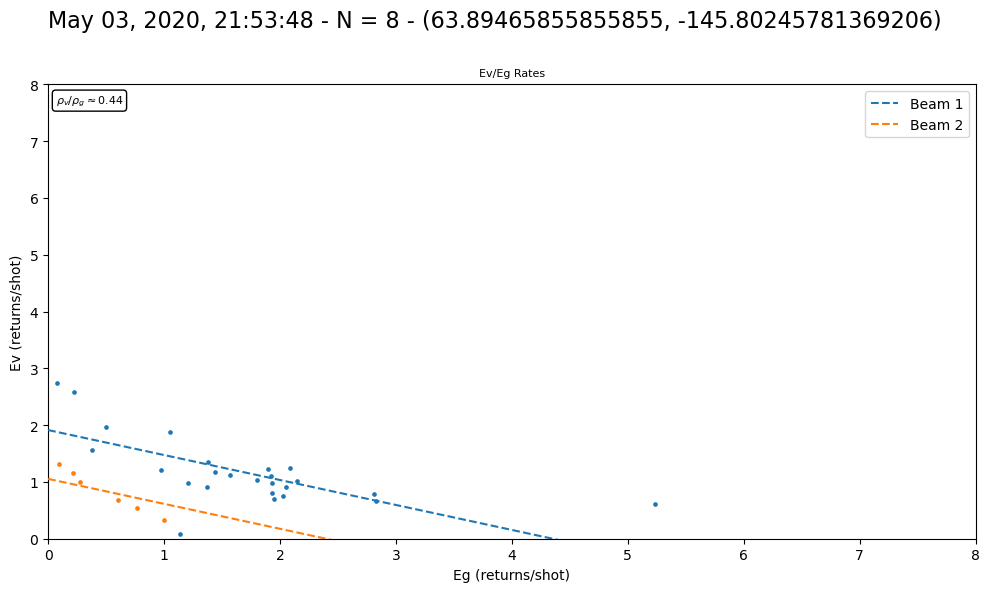

bartlett, FSC = 0.87
Nothing in rebinned section for bartlett file 4's beam 1.
Nothing in rebinned section for bartlett file 4's beam 2.
Nothing in rebinned section for bartlett file 4's beam 3.
Nothing in rebinned section for bartlett file 4's beam 4.


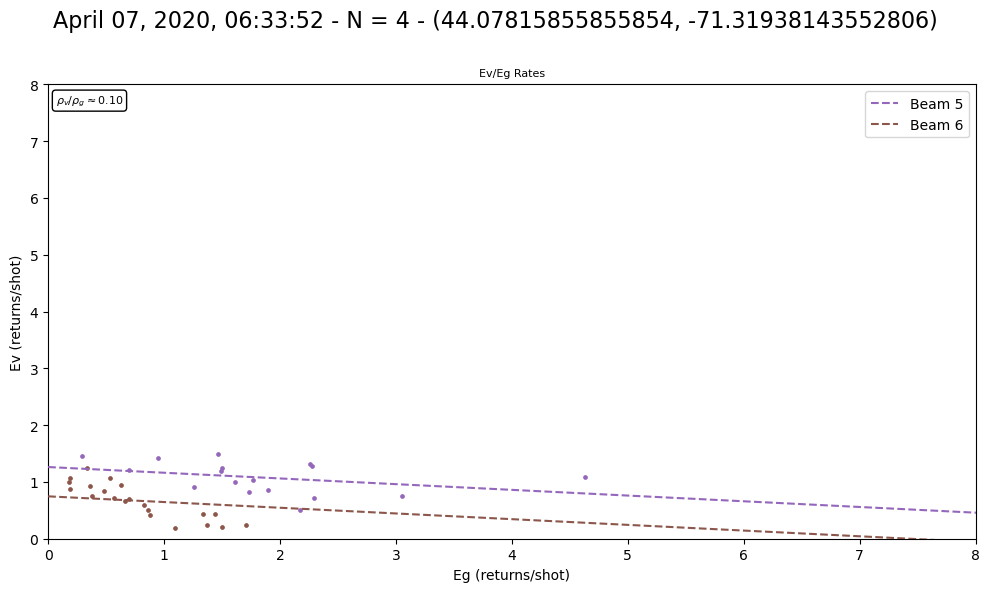

bartlett, FSC = 0.87
Nothing in rebinned section for bartlett file 4's beam 1.
Nothing in rebinned section for bartlett file 4's beam 2.
Nothing in rebinned section for bartlett file 4's beam 5.
Nothing in rebinned section for bartlett file 4's beam 6.


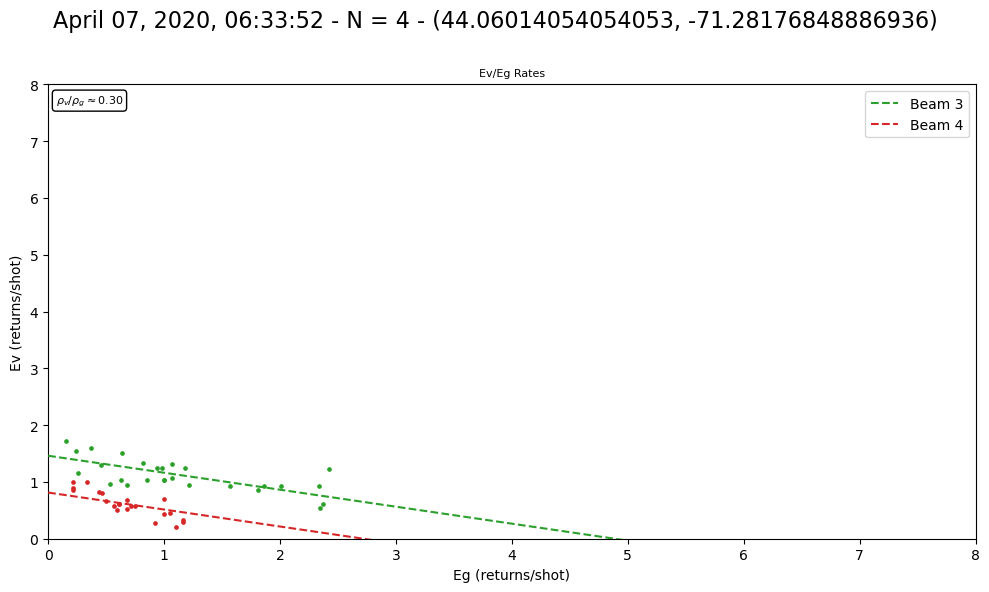

bartlett, FSC = 0.87
Nothing in rebinned section for bartlett file 4's beam 1.
Nothing in rebinned section for bartlett file 4's beam 2.
Nothing in rebinned section for bartlett file 4's beam 5.
Nothing in rebinned section for bartlett file 4's beam 6.


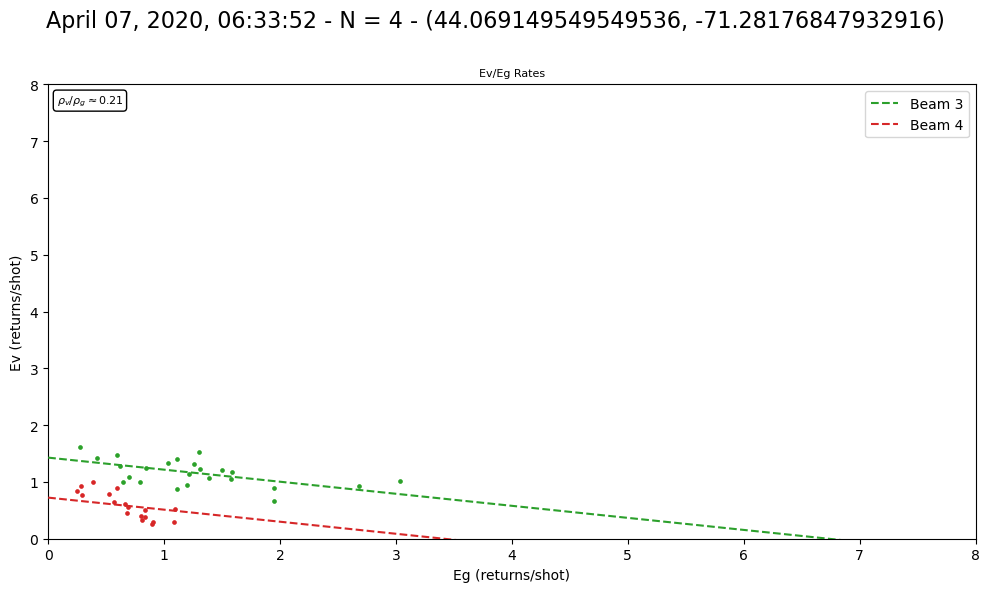

underc, FSC = 0.9
Nothing in rebinned section for underc file 19's beam 1.
Nothing in rebinned section for underc file 19's beam 2.
Nothing in rebinned section for underc file 19's beam 3.
Nothing in rebinned section for underc file 19's beam 4.


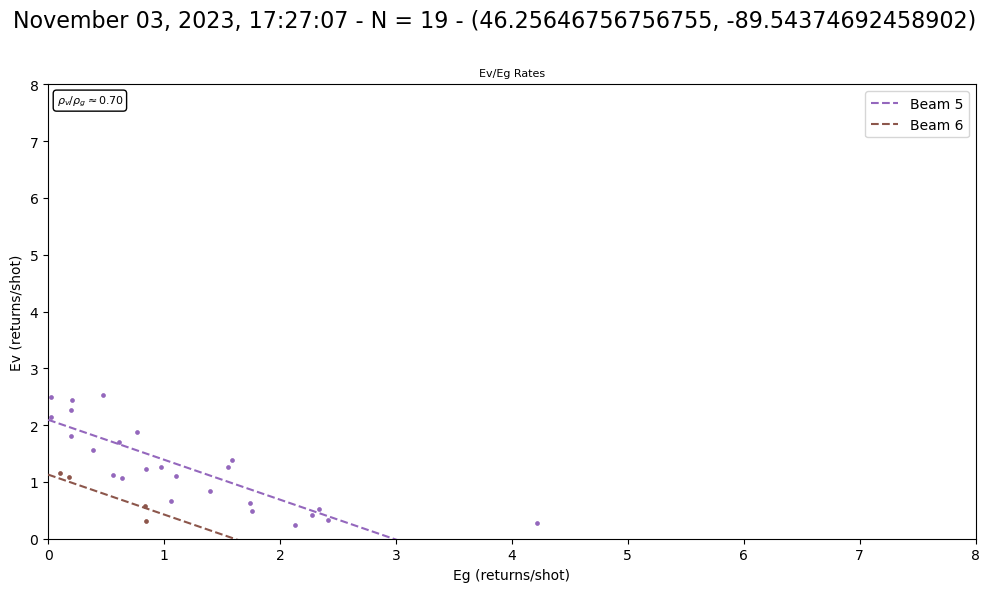

underc, FSC = 0.9
Nothing in rebinned section for underc file 19's beam 1.
Nothing in rebinned section for underc file 19's beam 2.
Nothing in rebinned section for underc file 19's beam 3.
Nothing in rebinned section for underc file 19's beam 4.


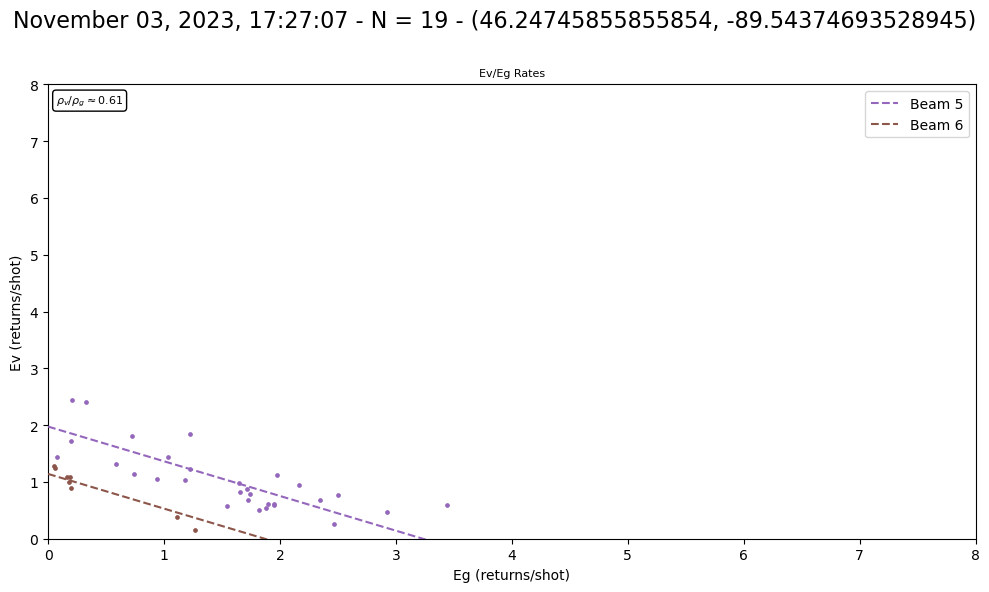

underc, FSC = 0.9
Nothing in rebinned section for underc file 19's beam 1.
Nothing in rebinned section for underc file 19's beam 2.
Nothing in rebinned section for underc file 19's beam 5.
Nothing in rebinned section for underc file 19's beam 6.


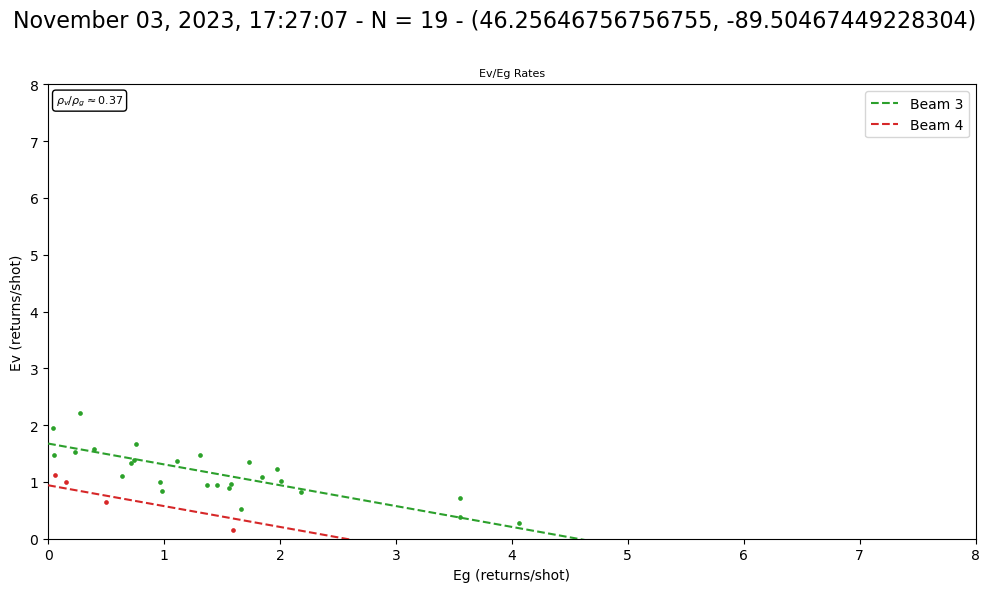

kenttarova, FSC = 0.94
Nothing in rebinned section for kenttarova file 2's beam 3.
Nothing in rebinned section for kenttarova file 2's beam 4.
Nothing in rebinned section for kenttarova file 2's beam 5.
Nothing in rebinned section for kenttarova file 2's beam 6.


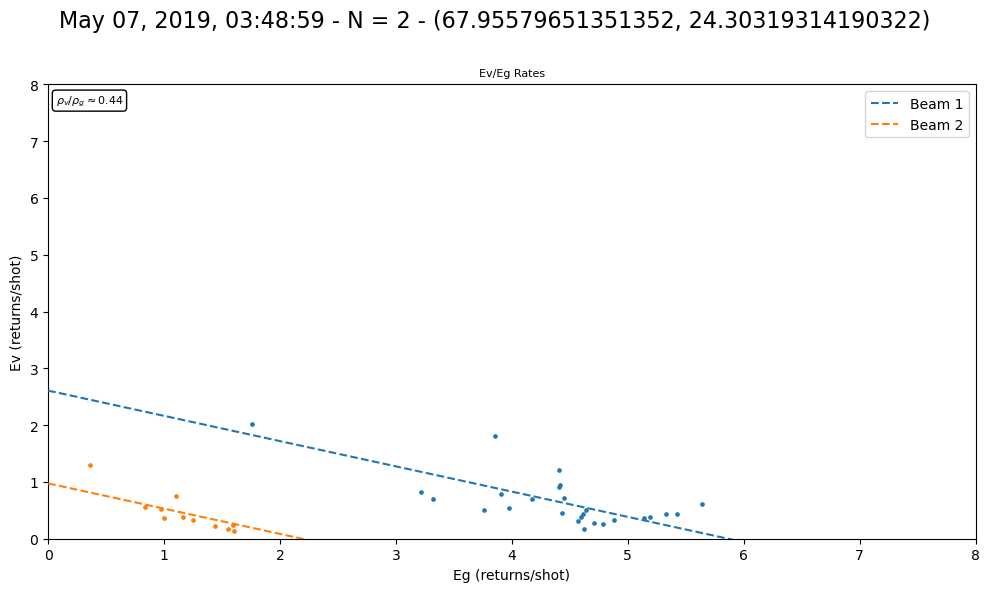

kenttarova, FSC = 0.94
Nothing in rebinned section for kenttarova file 2's beam 1.
Nothing in rebinned section for kenttarova file 2's beam 2.
Nothing in rebinned section for kenttarova file 2's beam 5.
Nothing in rebinned section for kenttarova file 2's beam 6.
kenttarova, FSC = 0.94
Nothing in rebinned section for kenttarova file 2's beam 3.
Nothing in rebinned section for kenttarova file 2's beam 4.
Nothing in rebinned section for kenttarova file 2's beam 5.
Nothing in rebinned section for kenttarova file 2's beam 6.


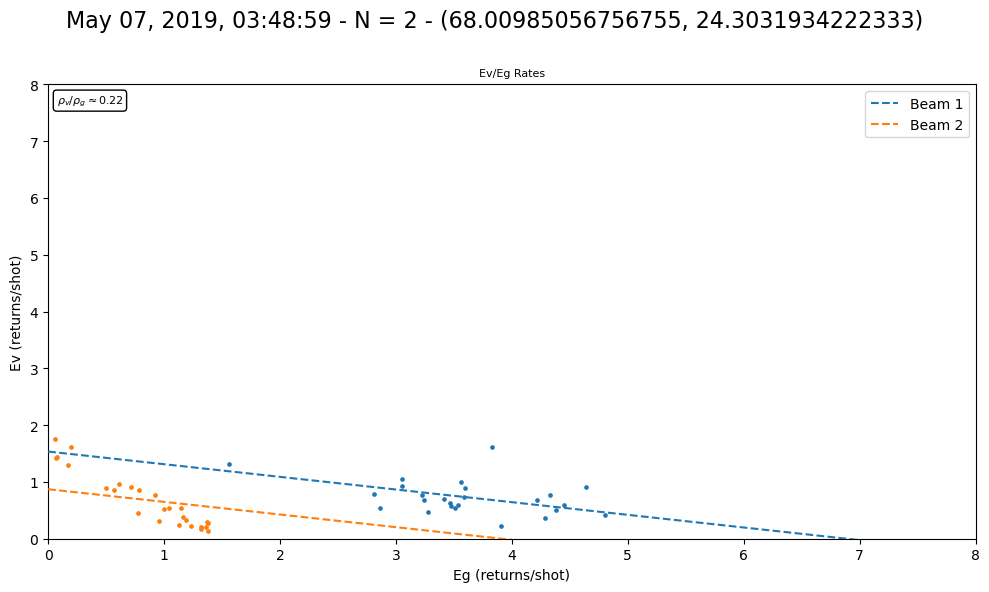

kenttarova, FSC = 0.94
Nothing in rebinned section for kenttarova file 2's beam 1.
Nothing in rebinned section for kenttarova file 2's beam 2.
Nothing in rebinned section for kenttarova file 2's beam 5.
Nothing in rebinned section for kenttarova file 2's beam 6.


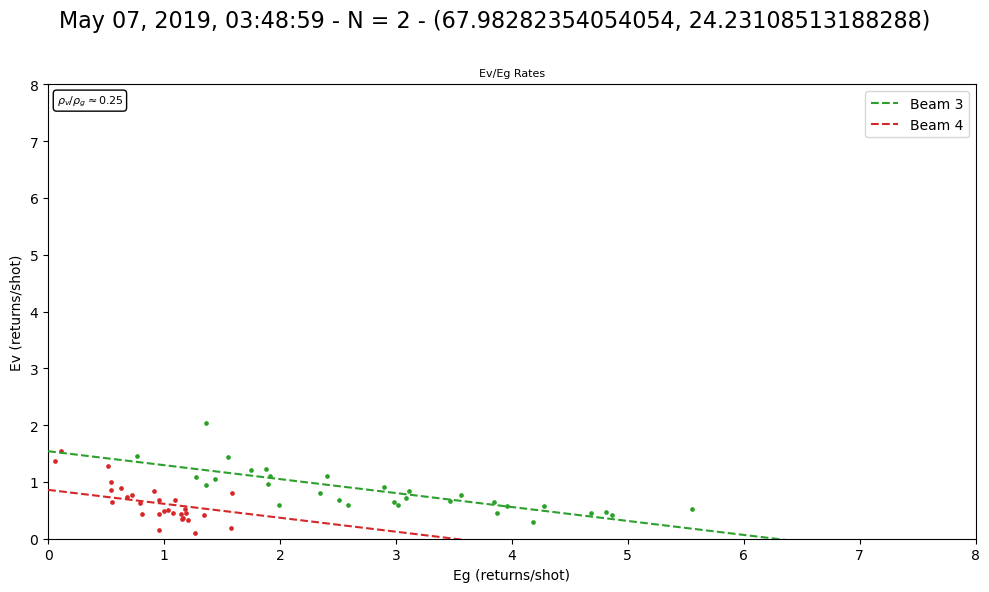

marcell_MN, FSC = 0.95
Nothing in rebinned section for marcell_MN file 9's beam 3.
Nothing in rebinned section for marcell_MN file 9's beam 4.
Nothing in rebinned section for marcell_MN file 9's beam 5.
Nothing in rebinned section for marcell_MN file 9's beam 6.


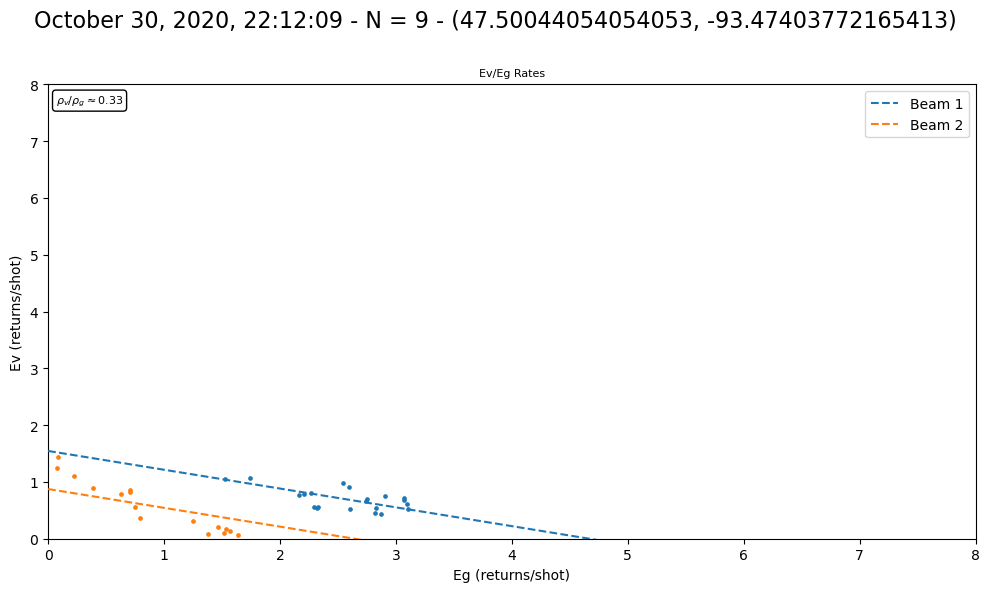

marcell_MN, FSC = 0.95
Nothing in rebinned section for marcell_MN file 9's beam 3.
Nothing in rebinned section for marcell_MN file 9's beam 4.
Nothing in rebinned section for marcell_MN file 9's beam 5.
Nothing in rebinned section for marcell_MN file 9's beam 6.


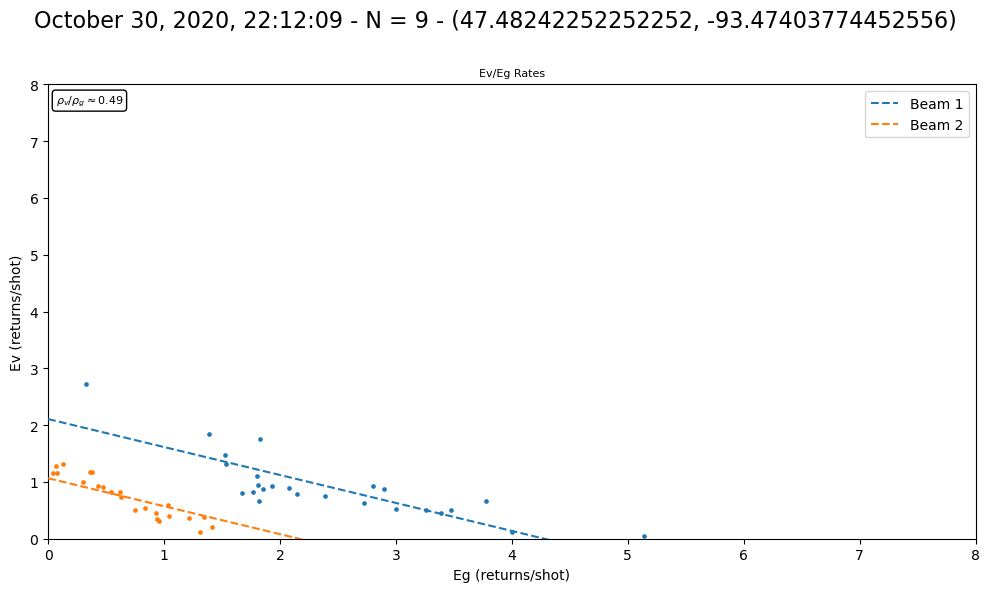

In [14]:
from scripts.parallel_blocks import *
import os

df = pd.read_pickle('dataset_lcforest_outlier22_th3_1km_noprior_ta.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg': 'median',
    'Ev': 'median',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
    'altitude': 'mean'
}).reset_index()

data = df_grouped[((df_grouped['FSC'] > 0.05)&(df_grouped['FSC'] < 0.95))
    &(df_grouped['pv'] <= 16)&(df_grouped['pg'] <= 16)&(df_grouped['pvpg'] <= 7.5)
    &(df_grouped['pv_ratio_mean'] >= 1.3)
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]

data.sort_values('FSC', inplace=True)

for _, row in data.iterrows():
    cam = row['camera']
    
    path1 = f'../data_store/data/{cam}/'
    path2 = f'../scratch/data/{cam}/'

    if os.path.exists(path1):
        dirpath = path1
    elif os.path.exists(path2):
        dirpath = path2
    else:
        print(f"No valid path for camera {cam}")
        continue

    all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)

    i = int(row['file_index'])

    print(f"{cam}, FSC = {round(row['FSC'],2)}")

    data_ = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=(row['lon'],row['lat']), width=.5,height=.5,file_index=i,\
                         alt_thresh=80, altitude=row['altitude'], threshold=3, small_box=1.01, graph_detail=1, loss='linear',\
                         rebinned=30, outlier_removal=0,method='normal', landcover='forest', trim_atmospheric=True, sat_flag =1,
                         DW=1, show_me_the_good_ones = 1)